![Add a relevant banner image here](path_to_image)

# **Flatiron Data Science Capstone Project 1: US Traffic Accidents**


## Overview

text here


# Business Understanding

The US Department of Transportation (DOT) is concerned about the number of traffic accidents across the US and wants to develop strategies to reduce accidents and improve road safety.

For the Department of Transportation (DOT), understanding and reducing traffic accidents is a critical mission that directly impacts public safety, economic costs, and quality of life across the United States.

This analysis matters from a stakeholder and business perspective:

-Economic Impact: Traffic accidents cost billions annually in medical expenses, property damage, and lost productivity, making even small reductions highly valuable.

-Public Safety: As a leading cause of injury and death, reducing traffic accidents directly fulfills DOT's core mandate to protect citizens.

-Infrastructure Prioritization: Data analysis enables strategic allocation of limited infrastructure improvement budgets to highest-risk areas.

-Policy Development: Accident data informs new safety regulations and provides metrics to evaluate existing programs' effectiveness.

-Stakeholder Accountability: Comprehensive analysis demonstrates evidence-based decision-making to Congress, local governments, and the public.

-Cross-Agency Collaboration: Shared data insights can align accident reduction efforts across DOT, law enforcement, and emergency services.

-Technology Integration: Understanding accident patterns guides how emerging vehicle technologies should be regulated to maximize safety benefits.

This project supports DOT's mission by translating complex accident data into actionable insights. By identifying key patterns and risk factors, it empowers smarter infractstructure investment, better regulation and ultimately safer roads for all.

Project Objectives:
1. Identify accident hotspots: This analysis will determine when and where accidents most frequently occur.  Patterns such as time of day, day of week, season, and geographic location will be examined to determine of there are critical hotspots and time periods that may warrant intervention.
2. Analyze environmental risk factors: This analysis will determine how weather conditions correlate with accident rates. Factors such as visibility, precipitation, temperature and other environmental variables will be examined to assess their impact on driver behavior and road conditions. The goal is to determine if certain weather conditions should trigger early warning notifications to drivers.
3. Identify infrastructure considerations: This analysis will determine how specific road features are associated with accident severity. This will include road design, signage, lighting, and other infrastructural elements that could contribute to or mitigate accident risk

By successfully identifying accident hotspots, environmental risk factors, and infracture considerations, DOT can execute initiatives to address these issues and fulfill its mission to the public.

# Data Understanding


Explore the US Accidents dataset to understand its structure, variables, scope, and limitations. Identify potential issues with the data and assess its suitability for addressing the business problem.

## Data Understanding - Overall

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load relevant imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stats
import scipy
import holidays

us_holidays = holidays.UnitedStates()  # Create a US holidays object to check for holidays

# column definitions in Onedrive


In [4]:
# load data
# df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv')

# PC path to the CSV file
df = pd.read_csv(r"C:\Users\jtlee\OneDrive\Documents\Flatiron Schoolwork\DS_11 Capstone\Project 1 US Traffic Accidents\US_Accidents_March23.csv")

# add laptop path to CSV file
# df = pd.read_csv(r'C:\Users\eeleoj62\OneDrive\Documents\Flatiron Schoolwork\DS_11 Capstone\Project 1 US Traffic Accidents\US_Accidents_March23.csv')

In [5]:
print(f"\nShape of US accidents dataset: {df.shape}\n")     # (rows, columns)

df.info()  # DataFrame info


Shape of US accidents dataset: (7728394, 46)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Ch

In [6]:
print(f"Print preview of the dataframe:\n")
print(df.head())

Print preview of the dataframe:

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False 

In [7]:
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
# convert severity to categories (for EDA and readibility)
severity_map = {
    1: 'Low',
    2: 'Moderate', 
    3: 'High',
    4: 'Severe'
}

df['Severity_Level'] = df['Severity'].map(severity_map)

## Data Understanding - Objective 1 Accident hotspot analysis

Will look at patterns such as time of day, day of week, season, and geogrpahic location

Temporal features:
Start time can be used to determine time of day categorized into periods such as morning, afternoon and evening to assess whether accidents occur during certain windows. Day of week - accidents may increase on certain weekdays such as Fridays due to end of week fatigure or increased traffic. Season - month of the year will be mapped to seasons to explore weather or seasonal patterns. using US federal holiday calendars we will tag whether accidents occurred on or during holidays when traffic and risk behaviors may increase 

Geographic features:
Geographic location will be determined using state, county and zip code. This will help identify regions with higher accident concentrations, supporting hotspot detection at multiple geographic levels.

Together, these temporal and spatial insights will help the DOT pinpoint high-risk times and locations, enabling targeted interventions such as increased patrols, public service campaigns, or infrastructure investment.

In [9]:
# Create new dataframe for objective 1 accident hotspot analysis

df_hotspots = df[['ID', 'Severity_Level', 'Start_Time', 'City', 'County', 'State', 'Zipcode', ]].copy()

print(f"Shape of hotspots df: {df_hotspots.shape}")
print(df_hotspots.info())
print(df_hotspots.isnull().sum())


Shape of hotspots df: (7728394, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ID              object
 1   Severity_Level  object
 2   Start_Time      object
 3   City            object
 4   County          object
 5   State           object
 6   Zipcode         object
dtypes: object(7)
memory usage: 412.7+ MB
None
ID                   0
Severity_Level       0
Start_Time           0
City               253
County               0
State                0
Zipcode           1915
dtype: int64


253 missing City and 1,915 zipcode values out of 7.7 million data points is not significant. They will be dropped, as they shouldn't hurt the analysis at all

In [10]:
# check for unique states and their counts
print(f"\nUnique states: {sorted(df['State'].unique())}")
print(f"\nNumber of states included in the dataset: {df['State'].nunique()}")



Unique states: ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

Number of states included in the dataset: 49


It appears that there are only 49 states included in this US accidents dataset. Upon further examination, DC has been included, and Alaska and Hawaii are not present in the data.

## Data Understanding - Objective 2 Environmental Risk Factors

Will look at environmental factors such as temperature, wind chill, humidity, pressure, visibility, wind speed, precipitation, and weather condition

In [11]:
# Create new dataframe for objective 1 accident hotspot analysis

df_weather = df[['ID', 'Severity_Level', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition' ]].copy()

print(f"Shape of weather df: {df_weather.shape}")
print(df_weather.info())
print(df_weather.isnull().sum())

Shape of weather df: (7728394, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity_Level     object 
 2   Temperature(F)     float64
 3   Wind_Chill(F)      float64
 4   Humidity(%)        float64
 5   Pressure(in)       float64
 6   Visibility(mi)     float64
 7   Wind_Speed(mph)    float64
 8   Precipitation(in)  float64
 9   Weather_Condition  object 
dtypes: float64(7), object(3)
memory usage: 589.6+ MB
None
ID                         0
Severity_Level             0
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
dtype: int64


There are missing values, most notably Wind_Chill and Precipitation, and to an extent wind speed

Temperature -> impute with median temp
Wind_chill -> impute with Temperature
Humidity -> impute with median humidity
Pressure -> impute with median pressure
visibility -> impute with median visibility
wind speed -> conditional median imputation 
df['Wind_Speed(mph)'] = df.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))
precipitation -> impute 0 (no rain)
weather condition -> impute 'Unknown'

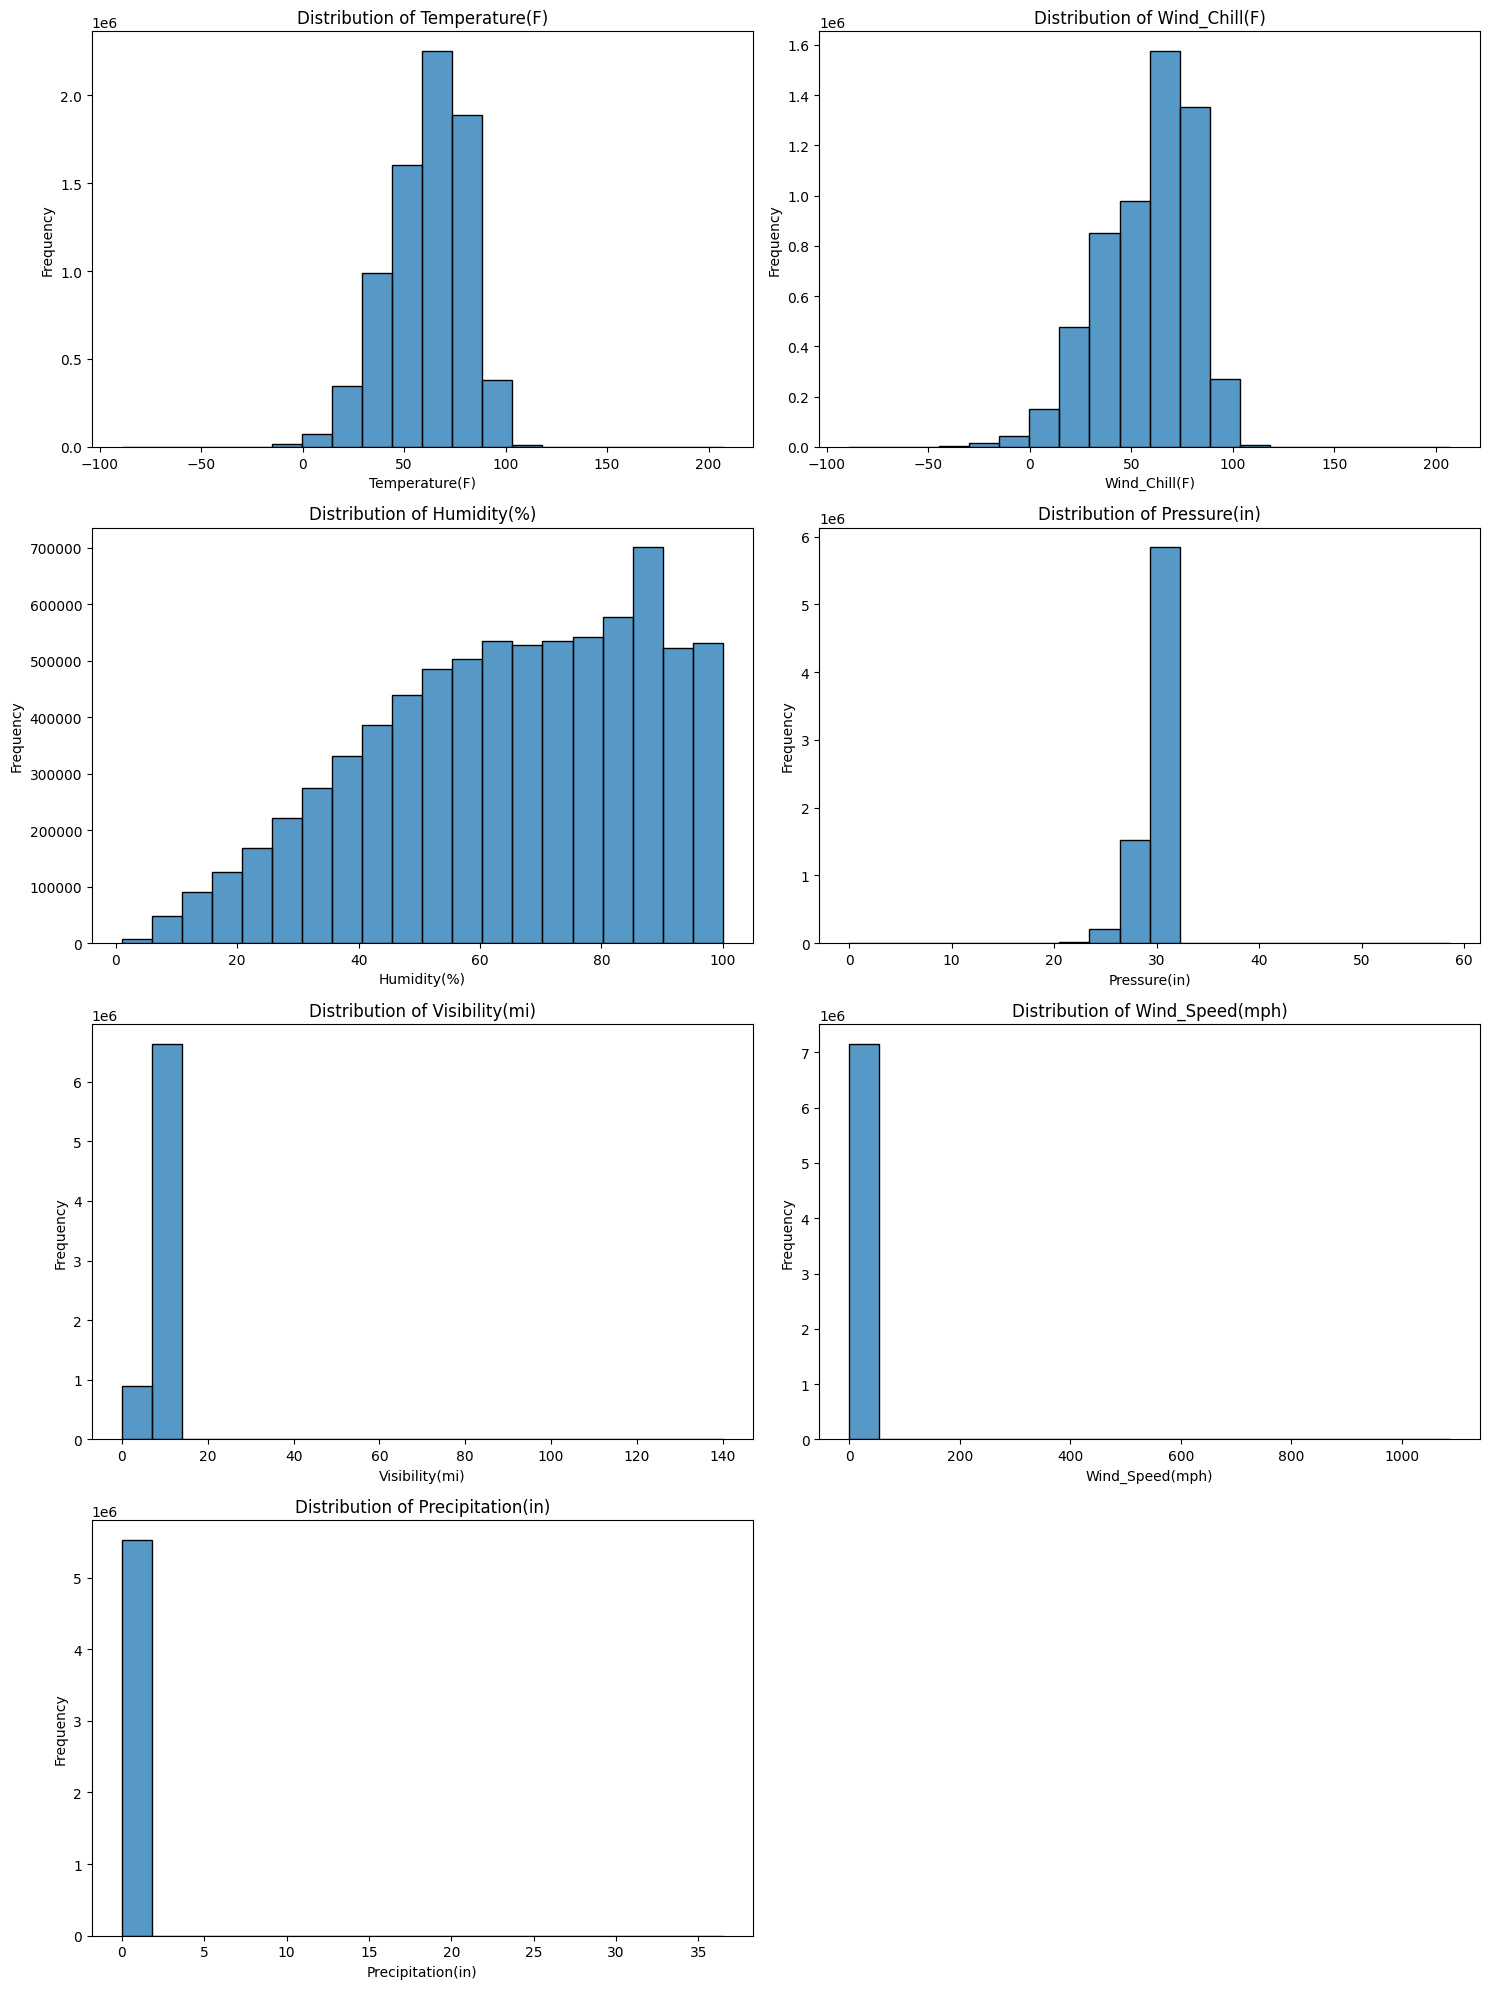

In [12]:
# visualize weather distributions

weather_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Set up subplots: 4 rows, 2 columns (adjust layout as needed)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Plot each weather feature in a subplot
for i, col in enumerate(weather_cols):
    sns.histplot(df_weather[col].dropna(), bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot if cols < subplots
for j in range(len(weather_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Check for outliers in temperature, pressure, visiblity, wind speed, and precipitation

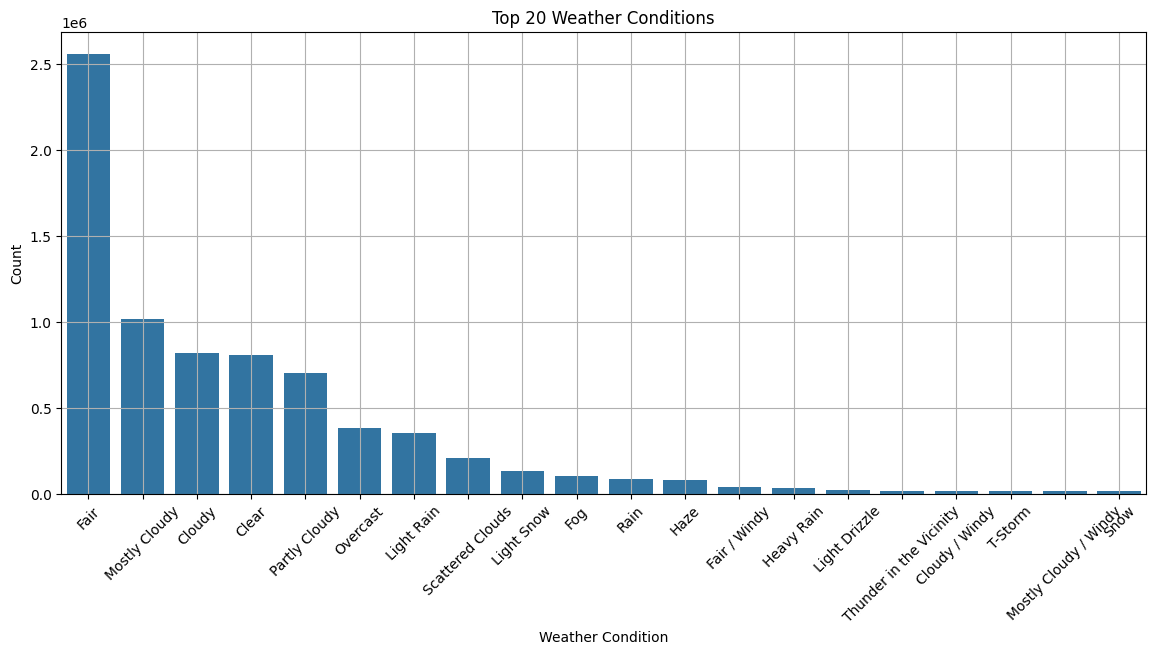

In [13]:
# visualize weather conditions

plt.figure(figsize=(14, 6))
top_weather = df['Weather_Condition'].value_counts().head(20)

sns.barplot(x=top_weather.index, y=top_weather.values)
plt.xticks(rotation=45)
plt.title('Top 20 Weather Conditions')
plt.ylabel('Count')
plt.xlabel('Weather Condition')
plt.grid(True)
plt.show()


## Data Understanding - Objective 3 Infrastructure Considerations


Examine infrastructure data for the bumps, crossings, yield signs, junctions, dead-ends/no-exit roads, railway crossings, roundabouts, stations (train, gas, etc.), stop signs, traffic calming features, traffic lights, and turning loops.

In [14]:
# Create new dataframe for objective 3 infrastructure analysis

df_infra = df[['ID', 'Severity_Level', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']].copy()

print(f"Shape of infrastructure df: {df_infra.shape}")
print(df_infra.info())
print(df_infra.isnull().sum())

Shape of infrastructure df: (7728394, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 14 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ID               object
 1   Severity_Level   object
 2   Bump             bool  
 3   Crossing         bool  
 4   Give_Way         bool  
 5   Junction         bool  
 6   No_Exit          bool  
 7   Railway          bool  
 8   Roundabout       bool  
 9   Station          bool  
 10  Stop             bool  
 11  Traffic_Calming  bool  
 12  Traffic_Signal   bool  
 13  Turning_Loop     bool  
dtypes: bool(12), object(2)
memory usage: 206.4+ MB
None
ID                 0
Severity_Level     0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64


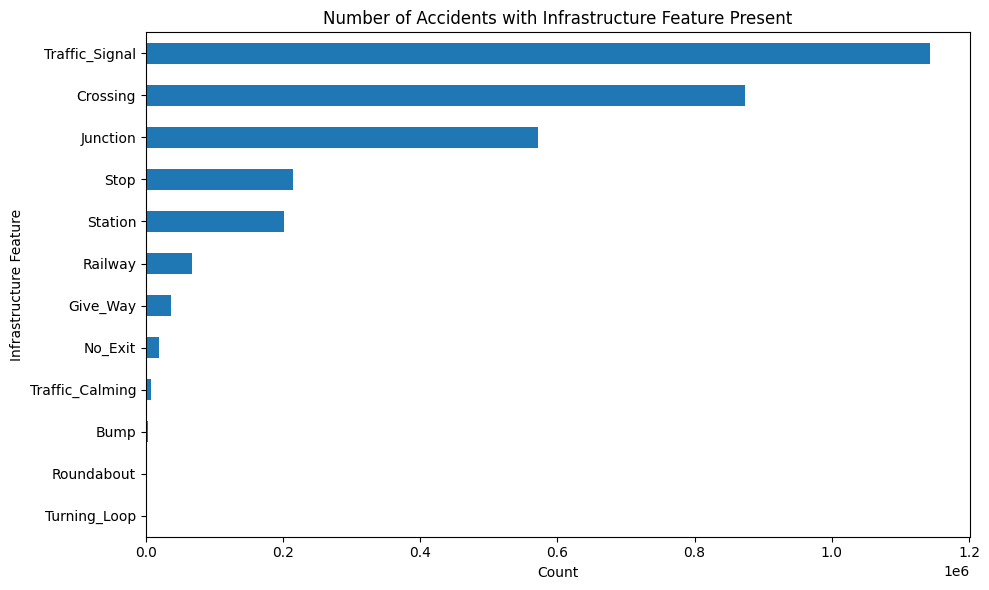

In [15]:
# visualize presence of infrastructure

infra_cols = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

infra_counts = df_infra[infra_cols].sum().sort_values()

plt.figure(figsize=(10, 6))
infra_counts.plot(kind='barh')
plt.title('Number of Accidents with Infrastructure Feature Present')
plt.xlabel('Count')
plt.ylabel('Infrastructure Feature')
plt.tight_layout()
plt.show()

# Data Preparation


Clean and preprocess the data, handling missing values, outliers, and duplicates. Create derived features that might provide additional insights (e.g., time of day categories, weather condition groupings).

## Data Prep - Objective 1 Accident hotspot analysis

In [16]:
# drop rows with missing City and Zipcode values
df_hotspots.dropna(subset=['City', 'Zipcode'], inplace=True)
df_hotspots.shape

(7726228, 7)

In [17]:
# take Start Time column and convert to datetime format
df_hotspots['Start_Time'] = pd.to_datetime(df_hotspots['Start_Time'], format='mixed', errors='coerce')

# create new column for time of day (hour of the day)
df_hotspots['Time_of_day'] = df_hotspots['Start_Time'].dt.hour

# create new column for day of week
# df_hotspots['day_of_week'] = df_hotspots['Start_Time'].dt.dayofweek

# convert day of week to actual day name
df_hotspots['Day_of_week'] = df_hotspots['Start_Time'].dt.day_name()

# Create a new column for whether the accident occurred on a holiday
df_hotspots['Is_Holiday'] = df_hotspots['Start_Time'].apply(
    lambda x: x.date() in us_holidays if pd.notnull(x) else False
)

print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

      Zipcode  Time_of_day Day_of_week  Is_Holiday  
0       45424            5      Monday       False  
1  43068-3402            6      Monday       False  
2       45176            6      Monday       False  
3       45417            7      Monday       False  
4       45459            7      Monday       False  


In [18]:
# define a function to get the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    
df_hotspots['Season'] = df_hotspots['Start_Time'].dt.month.apply(get_season)

print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

      Zipcode  Time_of_day Day_of_week  Is_Holiday  Season  
0       45424            5      Monday       False  Winter  
1  43068-3402            6      Monday       False  Winter  
2       45176            6      Monday       False  Winter  
3       45417            7      Monday       False  Winter  
4       45459            7      Monday       False  Winter  


In [19]:
# Check of consistency of spelling in top 50 city and county columns
print(df_hotspots['City'].value_counts().head(50))
print(df_hotspots['County'].value_counts().head(50))


City
Miami              186917
Houston            169609
Los Angeles        156491
Charlotte          138652
Dallas             130939
Orlando            109733
Austin              97359
Raleigh             86079
Nashville           72930
Baton Rouge         71588
Atlanta             68186
Sacramento          66264
San Diego           55504
Phoenix             53974
Minneapolis         51488
Richmond            48845
Oklahoma City       46092
Jacksonville        42447
Tucson              39304
Columbia            38178
San Antonio         37961
Greenville          37802
Saint Paul          37383
Seattle             36564
Portland            35399
San Jose            34536
Indianapolis        33219
Chicago             32035
Tampa               31193
Denver              30557
Kansas City         30107
Tulsa               28880
Riverside           27410
New Orleans         27354
Bronx               27297
Rochester           26866
Fort Lauderdale     26205
Detroit             24865
Grand R

In [20]:
# extract just the first 5 digits of the Zipcode column
# This is to ensure that the Zipcode column is in the correct format
df_hotspots['Zipcode'] = df_hotspots['Zipcode'].astype(str).str.extract(r'^(\d{5})')
print(df_hotspots['Zipcode'].value_counts().head(50))
print(df_hotspots['Zipcode'].unique())

Zipcode
27610    12907
33186    11952
32819    11894
91761    11455
70808    10971
28205    10797
91706    10556
28208    10411
27604    10185
37211     9931
92407     9925
28216     9832
33169     9809
70816     9762
92507     9548
70802     9381
28217     9354
90022     9333
33155     9225
29615     9168
90023     9153
29210     8965
32837     8817
33168     8817
28273     8792
27603     8727
37013     8641
70809     8415
91748     8389
27612     8226
33150     8222
37210     8142
28262     8137
75243     8083
32839     8078
37207     8009
27606     7913
78753     7870
27616     7809
90248     7724
29223     7719
91765     7695
27529     7634
90012     7565
33157     7536
92324     7515
28206     7450
32809     7407
27609     7265
33165     7200
Name: count, dtype: int64
['45424' '43068' '45176' ... '69120' '38614' '04231']


In [21]:
print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

  Zipcode  Time_of_day Day_of_week  Is_Holiday  Season  
0   45424            5      Monday       False  Winter  
1   43068            6      Monday       False  Winter  
2   45176            6      Monday       False  Winter  
3   45417            7      Monday       False  Winter  
4   45459            7      Monday       False  Winter  


In [22]:
# group accidents by time of day, group further into periods of the day
def convert_hour_to_period(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_hotspots['Time_period'] = df_hotspots['Time_of_day'].apply(convert_hour_to_period)
print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

  Zipcode  Time_of_day Day_of_week  Is_Holiday  Season Time_period  
0   45424            5      Monday       False  Winter  Late Night  
1   43068            6      Monday       False  Winter     Morning  
2   45176            6      Monday       False  Winter     Morning  
3   45417            7      Monday       False  Winter     Morning  
4   45459            7      Monday       False  Winter     Morning  


In [23]:
# examining value counts for the time periods
df_hotspots['Time_period'].value_counts()

Time_period
Morning       2631131
Afternoon     2307603
Evening       1527989
Late Night     774162
Night          485343
Name: count, dtype: int64

In [24]:
# examining value counts for days of the week
df_hotspots['Day_of_week'].value_counts()

Day_of_week
Friday       1366143
Thursday     1315850
Wednesday    1312030
Tuesday      1290592
Monday       1210587
Saturday      668470
Sunday        562556
Name: count, dtype: int64

In [25]:
# examining value counts for holidays
df_hotspots['Is_Holiday'].value_counts()

Is_Holiday
False    7497666
True      228562
Name: count, dtype: int64

In [26]:
print(df_hotspots.head())

    ID Severity_Level          Start_Time          City      County State  \
0  A-1           High 2016-02-08 05:46:00        Dayton  Montgomery    OH   
1  A-2       Moderate 2016-02-08 06:07:59  Reynoldsburg    Franklin    OH   
2  A-3       Moderate 2016-02-08 06:49:27  Williamsburg    Clermont    OH   
3  A-4           High 2016-02-08 07:23:34        Dayton  Montgomery    OH   
4  A-5       Moderate 2016-02-08 07:39:07        Dayton  Montgomery    OH   

  Zipcode  Time_of_day Day_of_week  Is_Holiday  Season Time_period  
0   45424            5      Monday       False  Winter  Late Night  
1   43068            6      Monday       False  Winter     Morning  
2   45176            6      Monday       False  Winter     Morning  
3   45417            7      Monday       False  Winter     Morning  
4   45459            7      Monday       False  Winter     Morning  


## Data Prep - Objective 2 Environmental risk 

Temperature -> impute with median temp
Wind_chill -> impute with Temperature
Humidity -> impute with median humidity
Pressure -> impute with median pressure
visibility -> impute with median visibility
wind speed -> conditional median imputation 
df['Wind_Speed(mph)'] = df.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))
precipitation -> impute 0 (no rain)
weather condition -> impute 'Unknown'

In [27]:
# determine outliers in temperature
print("\nTemperature statistics:")

print(df_weather['Temperature(F)'].describe())

Q1 = df_weather['Temperature(F)'].quantile(0.25)
Q3 = df_weather['Temperature(F)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# filter out outliers
df_weather = df_weather[df_weather['Temperature(F)'] <= 130]  # Ensure no extreme outliers above 130, anything over 130 is highly unlikely in the US

df_weather = df_weather[df_weather['Temperature(F)'] >= -60]  # Ensure no extreme outliers below -60, anything under is highly unlikely in the continental US

print(df_weather['Temperature(F)'].describe())


Temperature statistics:
count    7.564541e+06
mean     6.166329e+01
std      1.901365e+01
min     -8.900000e+01
25%      4.900000e+01
50%      6.400000e+01
75%      7.600000e+01
max      2.070000e+02
Name: Temperature(F), dtype: float64
count    7.564476e+06
mean     6.166312e+01
std      1.901064e+01
min     -5.800000e+01
25%      4.900000e+01
50%      6.400000e+01
75%      7.600000e+01
max      1.292000e+02
Name: Temperature(F), dtype: float64


In [28]:
# determine outliers in pressure
print("\nPressure statistics:")
print(df_weather['Pressure(in)'].describe())
Q1 = df_weather['Pressure(in)'].quantile(0.25)
Q3 = df_weather['Pressure(in)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
# filter out outliers
df_weather = df_weather[df_weather['Pressure(in)'] <= upper_bound]
print(df_weather['Pressure(in)'].describe())


Pressure statistics:
count    7.556568e+06
mean     2.953969e+01
std      1.004499e+00
min      0.000000e+00
25%      2.937000e+01
50%      2.986000e+01
75%      3.003000e+01
max      5.863000e+01
Name: Pressure(in), dtype: float64
count    7.556456e+06
mean     2.953950e+01
std      1.002692e+00
min      0.000000e+00
25%      2.937000e+01
50%      2.986000e+01
75%      3.003000e+01
max      3.102000e+01
Name: Pressure(in), dtype: float64


In [29]:
# determine outliers in visibility
print("\nVisibility(mi) statistics:")

print(df_weather['Visibility(mi)'].describe())

Q1 = df_weather['Visibility(mi)'].quantile(0.25)
Q3 = df_weather['Visibility(mi)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_weather = df_weather[df_weather['Visibility(mi)'] <= upper_bound]

print(df_weather['Visibility(mi)'].describe())


Visibility(mi) statistics:
count    7.517598e+06
mean     9.091059e+00
std      2.677726e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64
count    7.487217e+06
mean     9.032558e+00
std      2.337127e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.000000e+01
Name: Visibility(mi), dtype: float64


In [30]:
# determine outliers in wind speed
print("\nWind_Speed(mph) statistics:")

print(df_weather['Wind_Speed(mph)'].describe())

Q1 = df_weather['Wind_Speed(mph)'].quantile(0.25)
Q3 = df_weather['Wind_Speed(mph)'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df_weather = df_weather[df_weather['Wind_Speed(mph)'] <= 100] # Ensure no extreme outliers above 100 mph, anything over is highly unlikely in the US

print(df_weather['Wind_Speed(mph)'].describe())


Wind_Speed(mph) statistics:
count    7.077023e+06
mean     7.684673e+00
std      5.410428e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64
count    7.076901e+06
mean     7.680926e+00
std      5.257325e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.000000e+02
Name: Wind_Speed(mph), dtype: float64


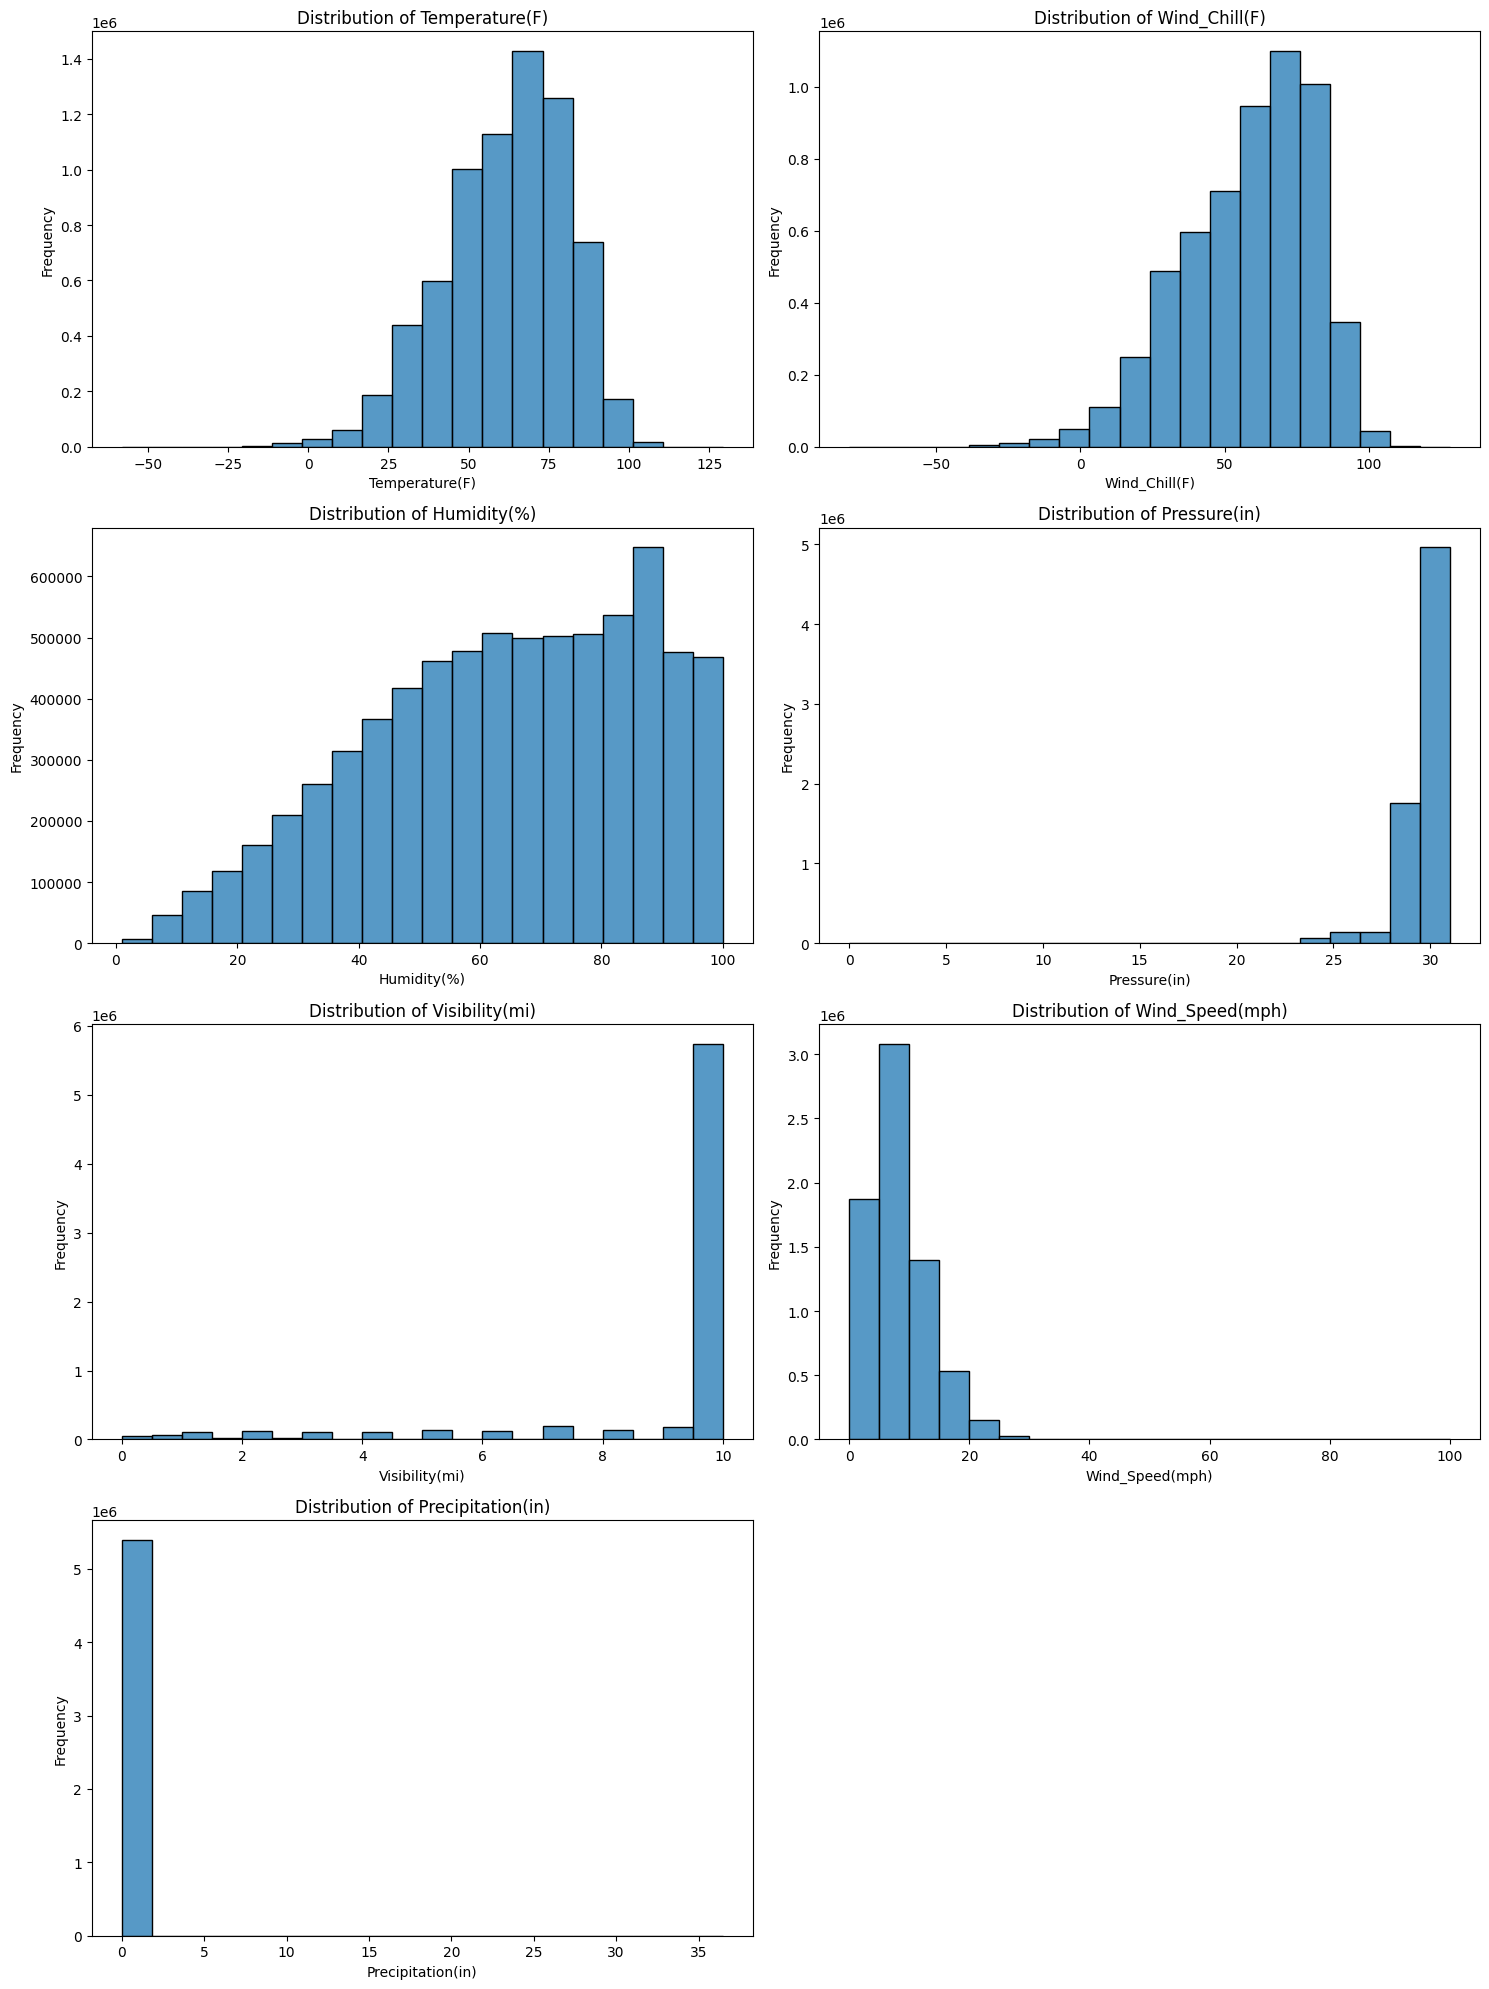

In [31]:
# visualize weather again to ensure outliers have been removed
# Set up subplots: 4 rows, 2 columns (adjust layout as needed)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Plot each weather feature in a subplot
for i, col in enumerate(weather_cols):
    sns.histplot(df_weather[col].dropna(), bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot if cols < subplots
for j in range(len(weather_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Temperature -> impute with median temp
Wind_chill -> impute with Temperature
Humidity -> impute with median humidity
Pressure -> impute with median pressure
visibility -> impute with median visibility
wind speed -> conditional median imputation 
df['Wind_Speed(mph)'] = df.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))
precipitation -> impute 0 (no rain)
weather condition -> impute 'Unknown'

In [32]:
# impute missing values in temperature column with median temperature
df_weather['Temperature(F)'].fillna(df_weather['Temperature(F)'].median(), inplace=True)

# impute missing values in wind chill column with median wind chill
df_weather['Wind_Chill(F)'].fillna(df_weather['Wind_Chill(F)'].median(), inplace=True)

# impute missing values in humidity column with median humidity
df_weather['Humidity(%)'].fillna(df_weather['Humidity(%)'].median(), inplace=True)

# impute missing values in pressure with median pressure
df_weather['Pressure(in)'].fillna(df_weather['Pressure(in)'].median(), inplace=True)

# impute missing values in visibility with median visibility
df_weather['Visibility(mi)'].fillna(df_weather['Visibility(mi)'].median(), inplace=True)

# impute missing values in wind speed with median wind speed
df_weather['Wind_Speed(mph)'] = df_weather.groupby('Weather_Condition')['Wind_Speed(mph)']\
                          .transform(lambda x: x.fillna(x.median()))

# impute missing values in precipitation column with 0 (no rain)
df_weather['Precipitation(in)'].fillna(0, inplace=True)

# impute missing values in weather condition column with 'Clear'
df_weather['Weather_Condition'].fillna('Clear', inplace=True)

C:\Users\jtlee\AppData\Local\Temp\ipykernel_31792\3237809773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['Temperature(F)'].fillna(df_weather['Temperature(F)'].median(), inplace=True)
C:\Users\jtlee\AppData\Local\Temp\ipykernel_31792\3237809773.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [33]:
print(df_weather.head())

    ID Severity_Level  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
2  A-3       Moderate            36.0           33.3        100.0   
3  A-4           High            35.1           31.0         96.0   
4  A-5       Moderate            36.0           33.3         89.0   
5  A-6           High            37.9           35.5         97.0   
6  A-7       Moderate            34.0           31.0        100.0   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  \
2         29.67            10.0              3.5               0.00   
3         29.64             9.0              4.6               0.00   
4         29.65             6.0              3.5               0.00   
5         29.63             7.0              3.5               0.03   
6         29.66             7.0              3.5               0.00   

  Weather_Condition  
2          Overcast  
3     Mostly Cloudy  
4     Mostly Cloudy  
5        Light Rain  
6          Overcast  


## Data Prep - Objective 3 Infrastructure considerations

Every infrastructure column (bool type) is completed. No imputation or rows drops are required.There are no outliers because bool is just True/False

In [34]:
# convert booleans to integers
df_infra[infra_cols] = df_infra[infra_cols].astype(int)

In [35]:
print(df_infra.head())

    ID Severity_Level  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
0  A-1           High     0         0         0         0        0        0   
1  A-2       Moderate     0         0         0         0        0        0   
2  A-3       Moderate     0         0         0         0        0        0   
3  A-4           High     0         0         0         0        0        0   
4  A-5       Moderate     0         0         0         0        0        0   

   Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  
0           0        0     0                0               0             0  
1           0        0     0                0               0             0  
2           0        0     0                0               1             0  
3           0        0     0                0               0             0  
4           0        0     0                0               1             0  


# Exploratory Data Analysis

Conduct analysis driven by business questions
Create different visualizations to illustrate findings
Include clear interpretations for each visualization
Document any surprising findings or counterintuitive patterns

Apply appropriate statistical methods to identify patterns, correlations, and significant factors. Test hypotheses about accident causes and contributing factors.

## Exploratory Data Analysis - Objective 1 Accident hotspots

In [36]:
# Define the severity order from least to most severe
severity_order = ['Low', 'Moderate', 'High', 'Severe']

# Convert the column to a categorical type with that order
df_hotspots['Severity_Level'] = pd.Categorical(
    df_hotspots['Severity_Level'],
    categories=severity_order,
    ordered=True
)

df_hotspots['Is_Holiday'] = df_hotspots['Is_Holiday'].astype(str)

# merge county and state to avoid the merging of Orange County CA and Orange County FL
df_hotspots['County_State'] = df_hotspots['County'] + ', ' + df_hotspots['State']


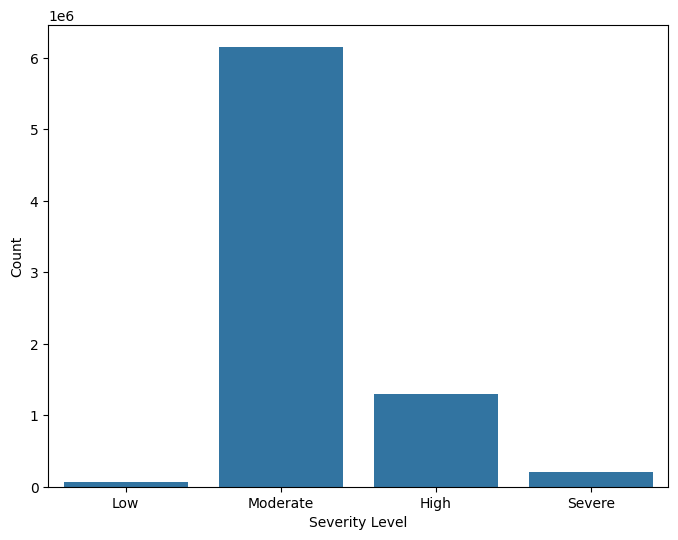

In [37]:
# explore columns individually

# severity levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df_hotspots, x='Severity_Level', order=severity_order)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

Most accidents are classified as Moderate (level 2) severity level, followed by High (level 3) severity level, then severe (level 4), and lastly Low (level 1).

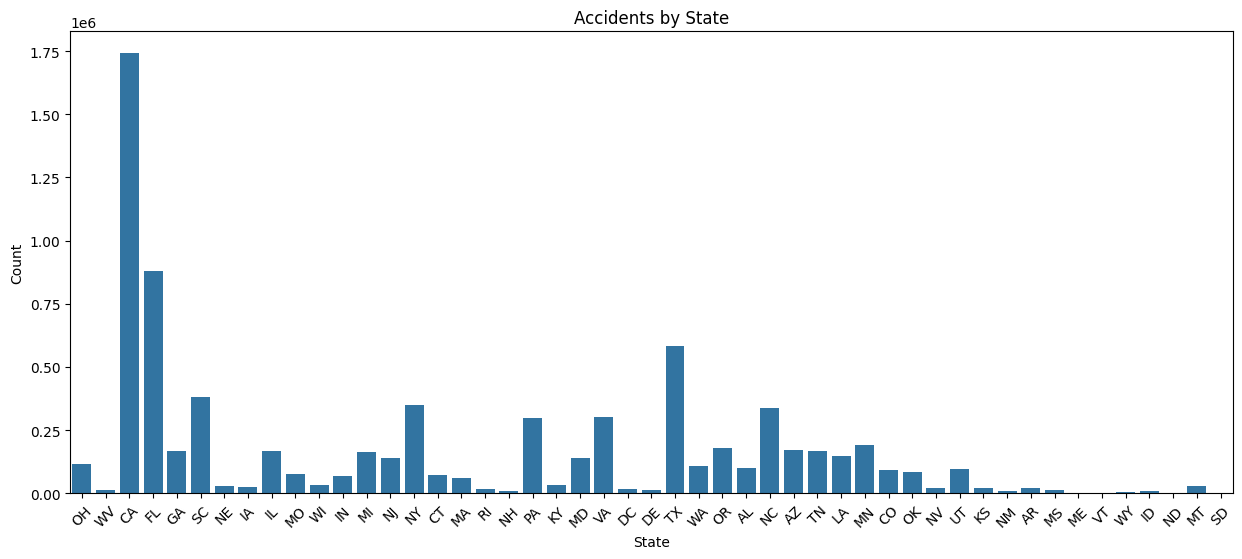

In [38]:
# accidents by state
plt.figure(figsize=(15, 6))
sns.countplot(data=df_hotspots, x='State')
plt.title('Accidents by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The most accidents occur in the state of California, followed by Florida, then Texas, and then SC/NY/PA/VA/NC.

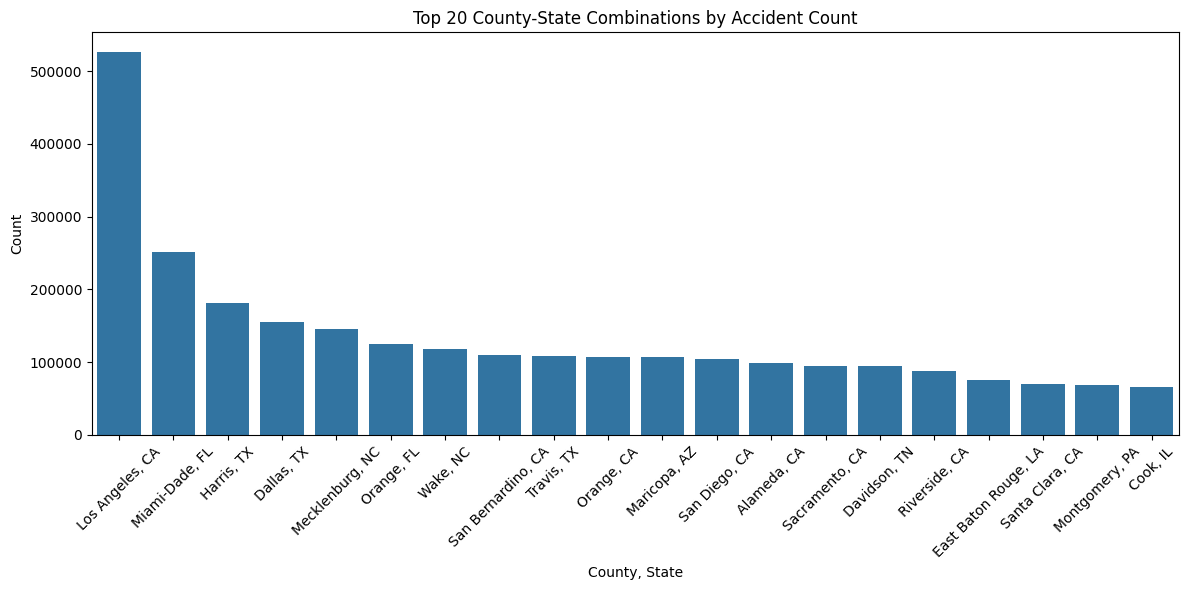

In [39]:
# accidents by county
top_counties = df_hotspots['County_State'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_counties.index, y=top_counties.values)
plt.title('Top 20 County-State Combinations by Accident Count')
plt.xlabel('County, State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most accidents occur in the county of Los Angeles of CA, followed by the counties of Miami-Dade of Florida, Harris of TX, Dallas of tX and Mecklenburg of NC

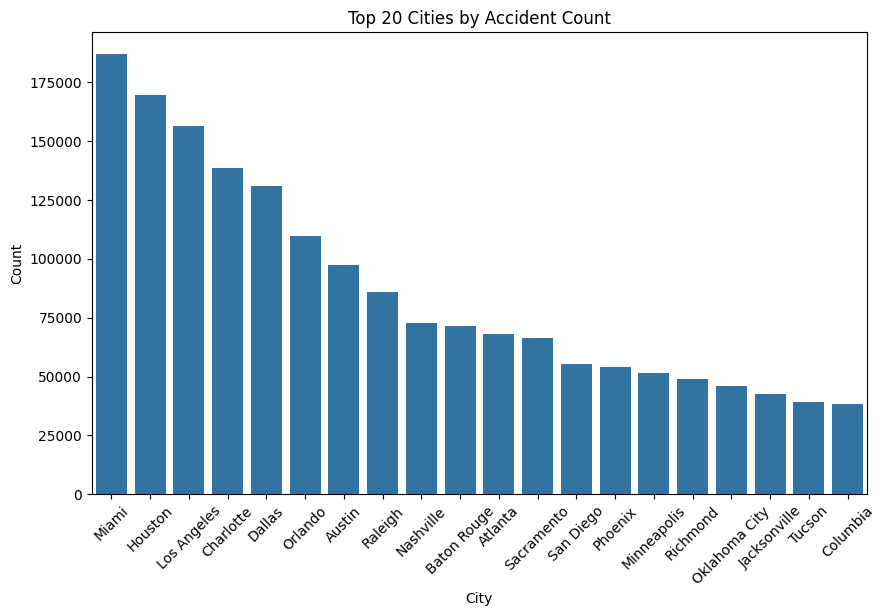

In [40]:
# accidents by city

top_cities = df_hotspots['City'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 20 Cities by Accident Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The cities with the most accidents are Miami, Houston, Los Angeles, Charlotte, then Dallas.

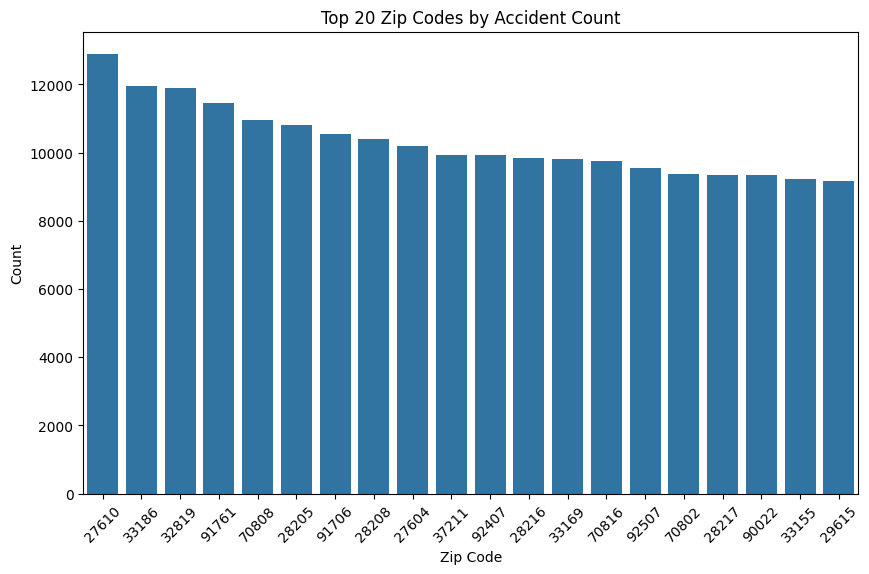

In [41]:
# explore accidents by zipcode
top_zip = df_hotspots['Zipcode'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_zip.index, y=top_zip.values)
plt.title('Top 20 Zip Codes by Accident Count')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

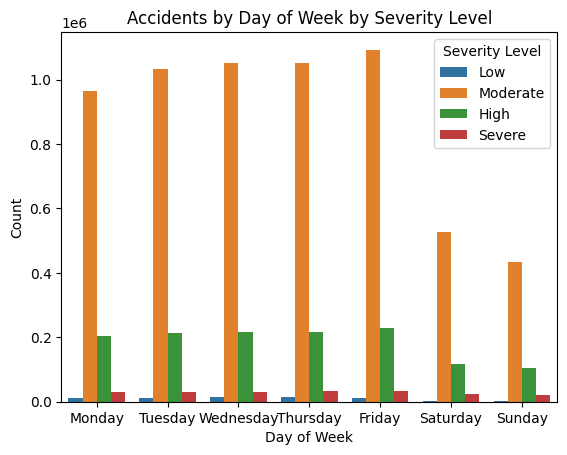

In [42]:
# accidents by day of week
plt.figure()
sns.countplot(data=df_hotspots, x='Day_of_week', hue='Severity_Level')

plt.title('Accidents by Day of Week by Severity Level')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

The day of week with the most accidents is Friday. There appears to be an upward trend in accidents as the days of the week go on from Monday through Friday.

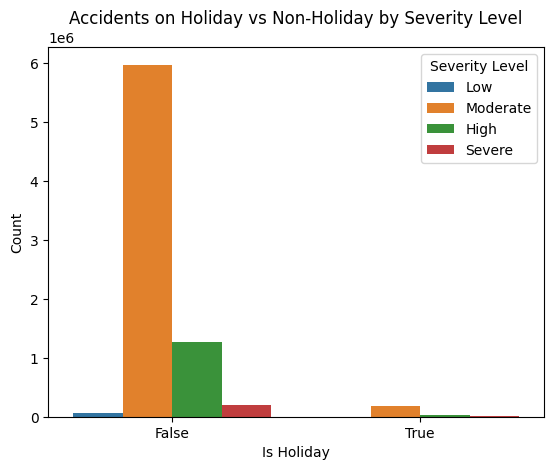

In [43]:
# accidents on holiday vs non-holiday by severity level

plt.figure()
sns.countplot(data=df_hotspots, x='Is_Holiday', hue='Severity_Level')

plt.title('Accidents on Holiday vs Non-Holiday by Severity Level')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

There is not a significant increase in severity level of accidents due to holidays.

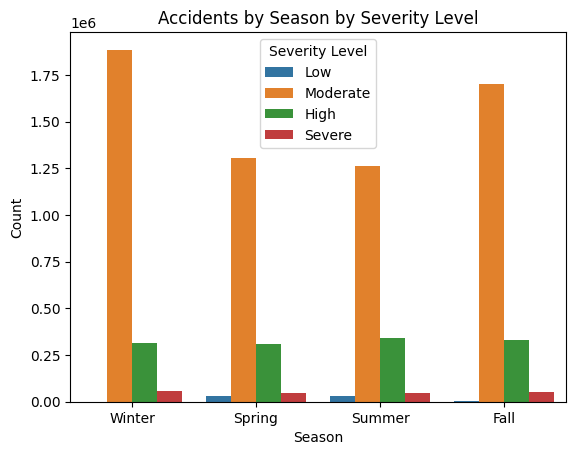

In [44]:
# accidents by season by severity level
plt.figure()
sns.countplot(data=df_hotspots, x='Season', hue='Severity_Level')

plt.title('Accidents by Season by Severity Level')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

The most accidents occur in Winter followed by Fall. This makes sense as Winter and Fall have more inclement weather that would be detrimental to driving.

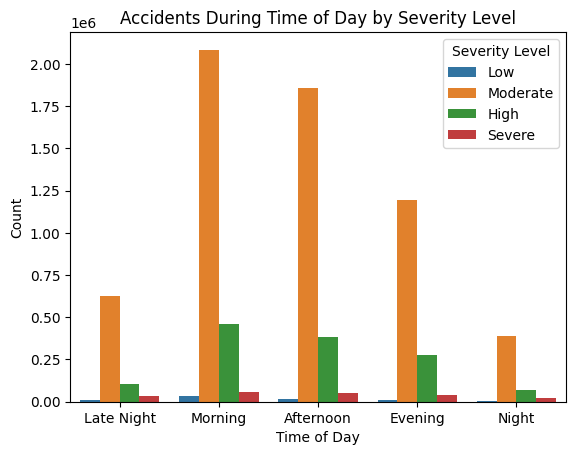

In [45]:
# accidents by time of day
plt.figure()
sns.countplot(data=df_hotspots, x='Time_period', hue='Severity_Level')

plt.title('Accidents During Time of Day by Severity Level')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()

Visual assessment of plots split by severity level shows that the only severity level that changes between day of week, season and time of day is the moderate severity level mainly, and to a lesser extent the Highs. 

Most accidents happen in urban cities like Miami, LA, Houston, Charlotte and Dallas, and their associated counties. High population and traffic density are highly correlated.

Friday is the most accident-prone day. This confirms common traffic behavior (rush hour and fatigue).

Morning and afternoon are peak hours for accidents most likely due to commute times.

There is no big holiday effect which is counterintuitive. Perhaps holidays are safer because there are less cars on the road, aside from the extra packed rush hour times.

DOT should focus on weekday rush hours in dense urban counties.

In [46]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[39.5, -98.35], zoom_start=5)  # center of US
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.sample(10000).iterrows()]
HeatMap(heat_data).add_to(m)
m.save('us_accident_heatmap.html')


## Exploratory Data Analysis - Objective 2 Environmental risk

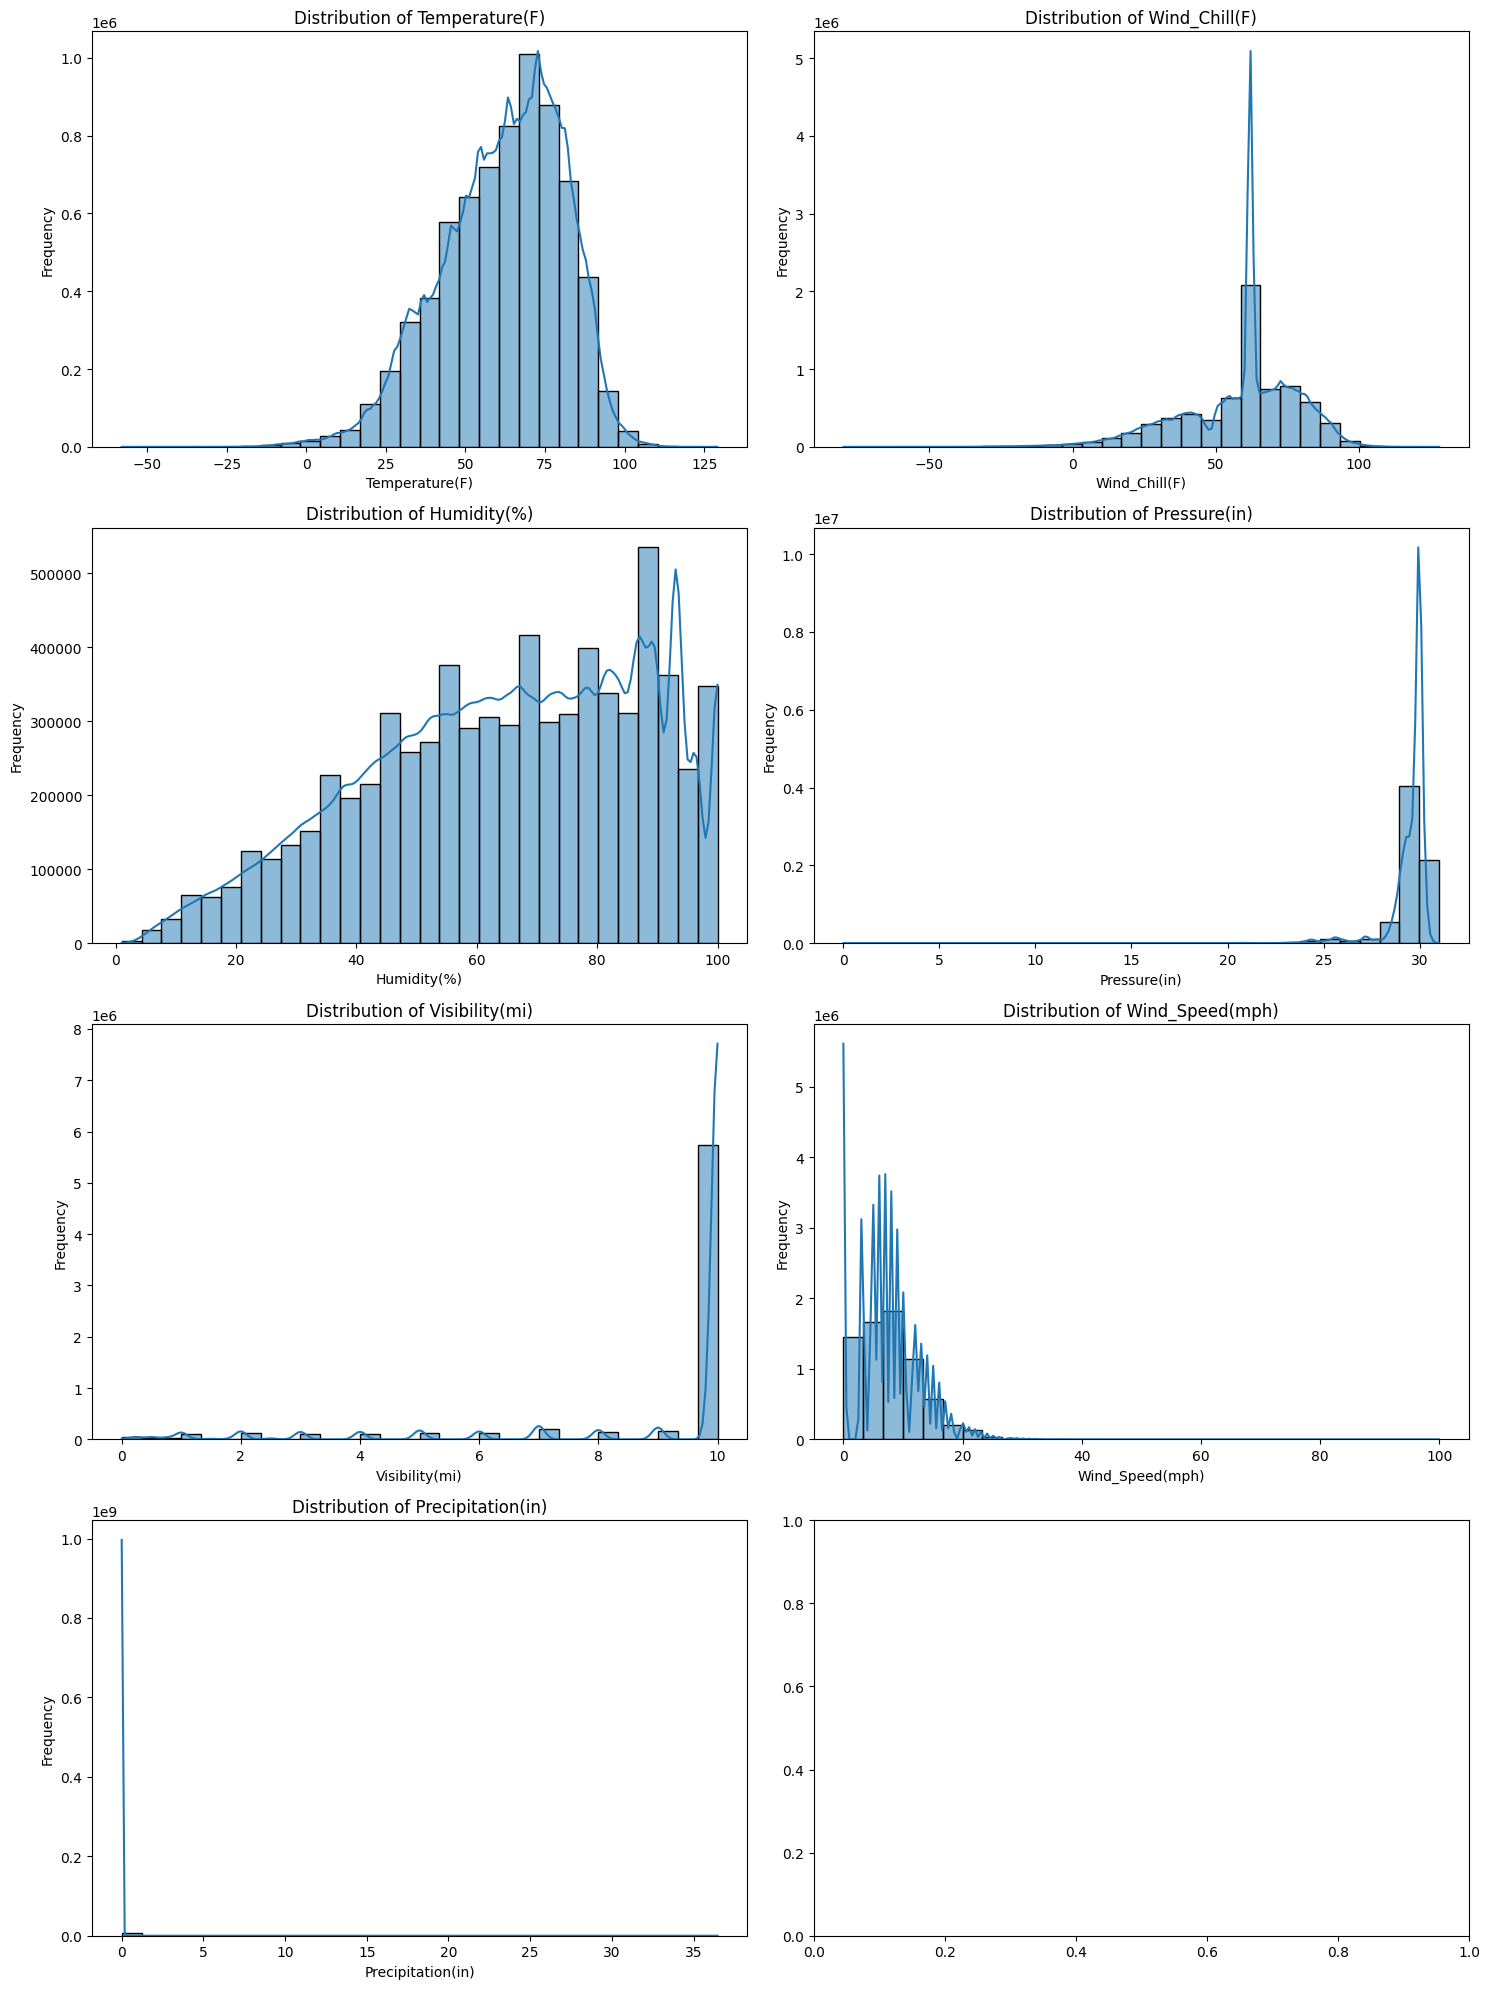

In [47]:
weather_cols = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(weather_cols):
    sns.histplot(df_weather[col], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# took 2m 17.9s to run on 7/8/25

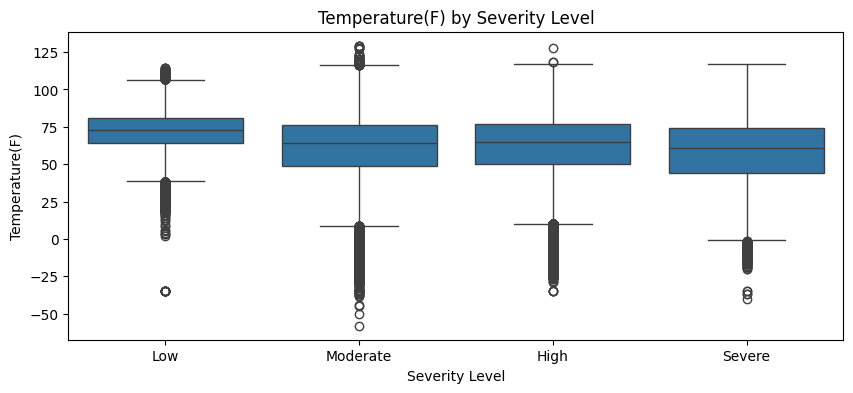

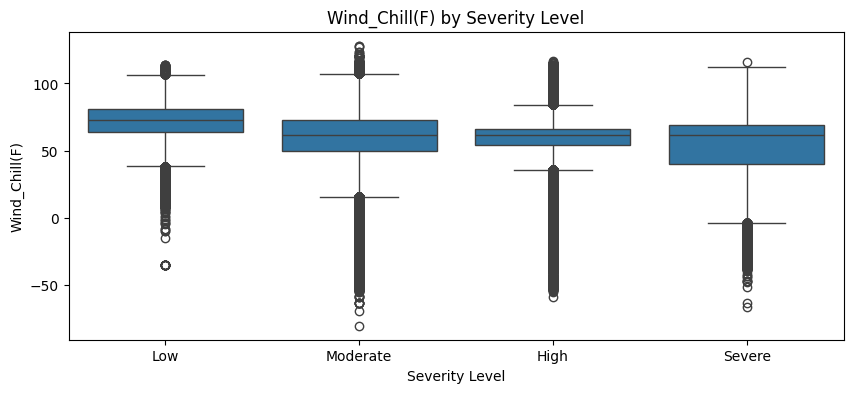

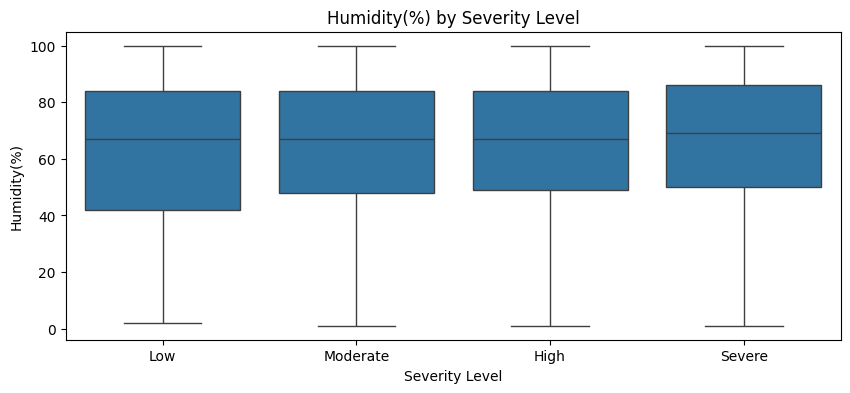

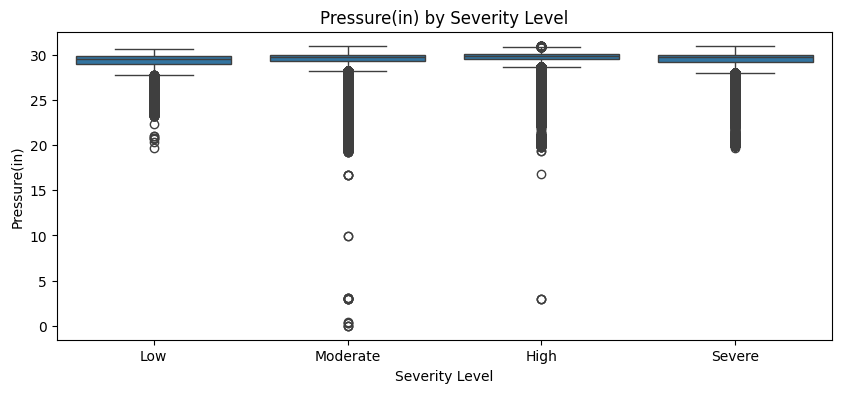

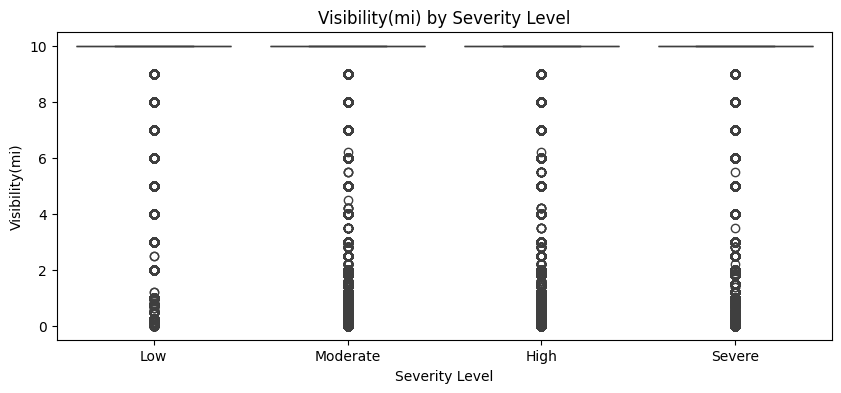

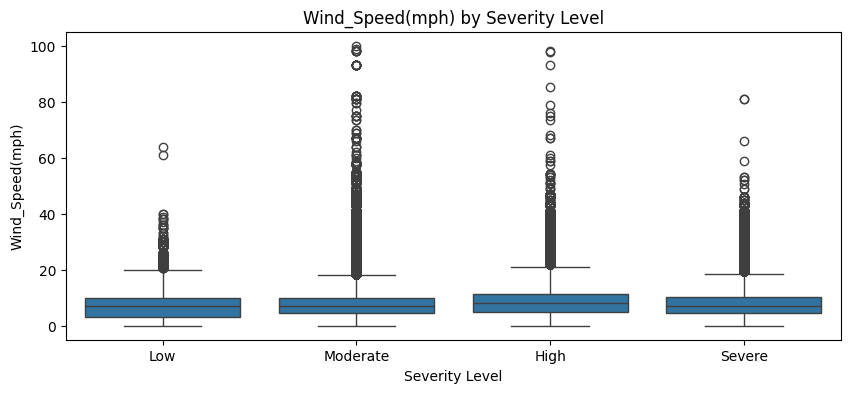

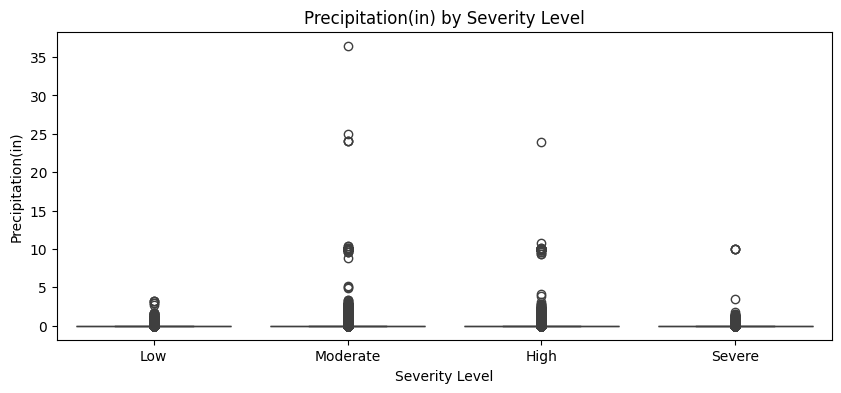

In [48]:
for col in weather_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df_weather, x='Severity_Level', y=col, order=severity_order)
    plt.title(f'{col} by Severity Level')
    plt.xlabel('Severity Level')
    plt.ylabel(col)
    plt.show()


There are no clear trends when comparing weather conditions vs severity levels of accidents, which is surprising but provides some insight at the same time.

This may lead to the conclusion that weather is not a major contributor to the occurrence of accidents. There may be other reasons such as distracted driving, congestion, or infrastructure may matter more.

## Exploratory Data Analysis - Objective 3 Infrastructure considerations

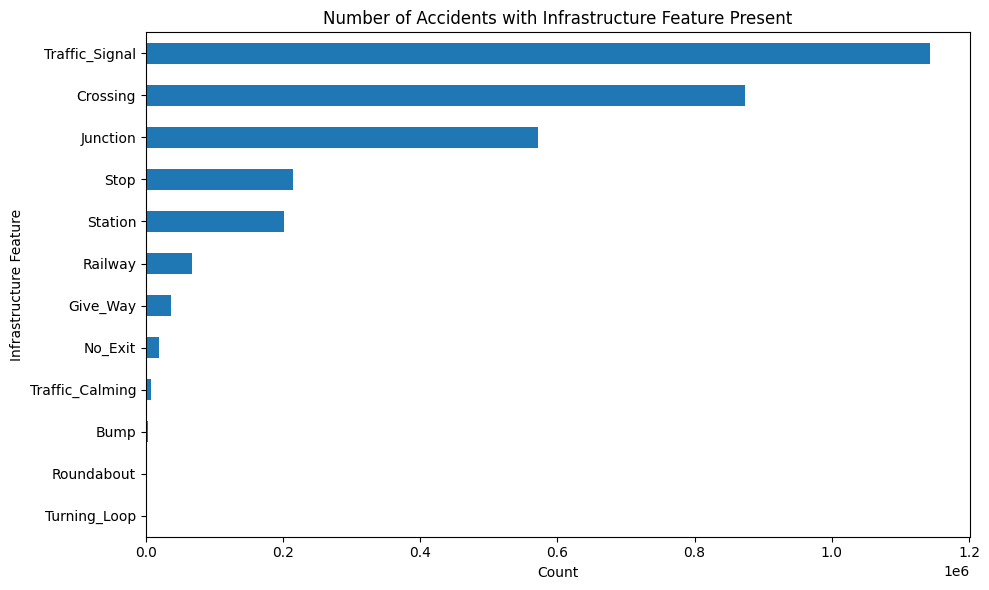

In [49]:
infra_cols = [
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Count how many accidents had each feature
infra_counts = df_infra[infra_cols].sum().sort_values()

plt.figure(figsize=(10, 6))
infra_counts.plot(kind='barh')
plt.title('Number of Accidents with Infrastructure Feature Present')
plt.xlabel('Count')
plt.ylabel('Infrastructure Feature')
plt.tight_layout()
plt.show()


Most accidents occur near traffic signals, then near pedestrian crossings, near junctions, and then near stop signs and train/gas stations.

This is surprising because the traffic signals are there to direct traffic. At the same time it shouldn't be surprising since this is where the most "interactions" between cars on the road occur.

Next is near crossings which also should make sense because that is the junction where cars and pedestrians cross paths.

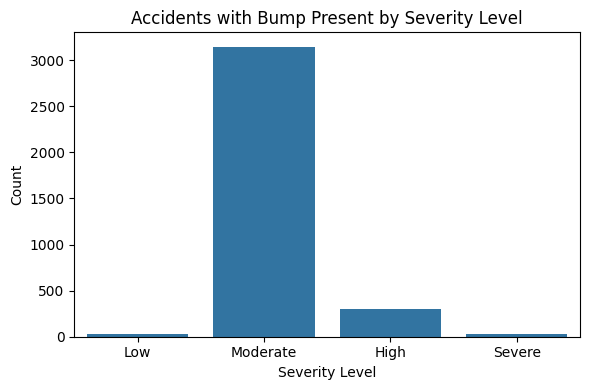

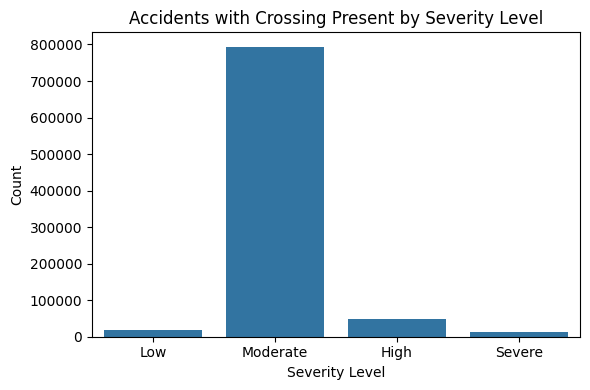

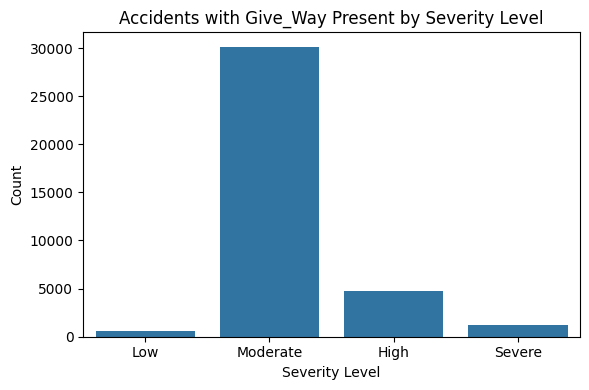

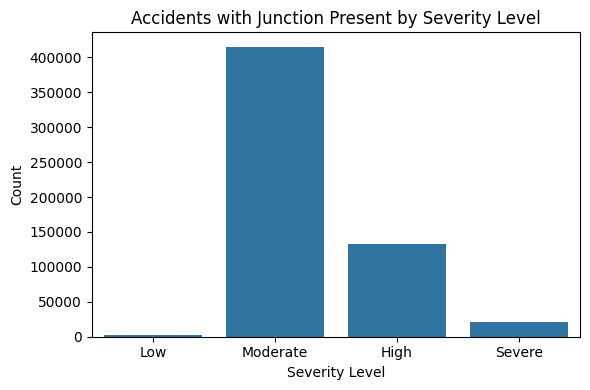

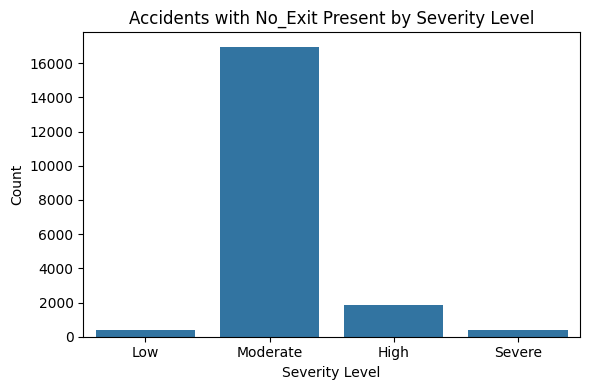

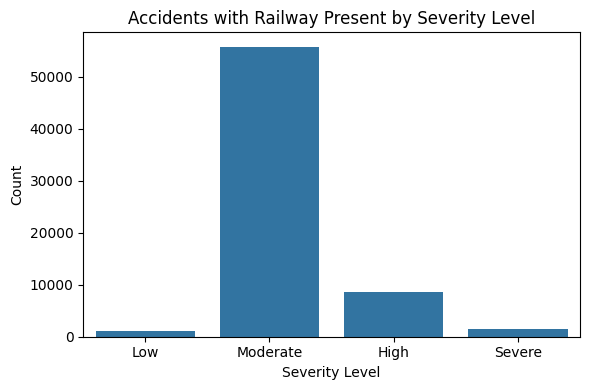

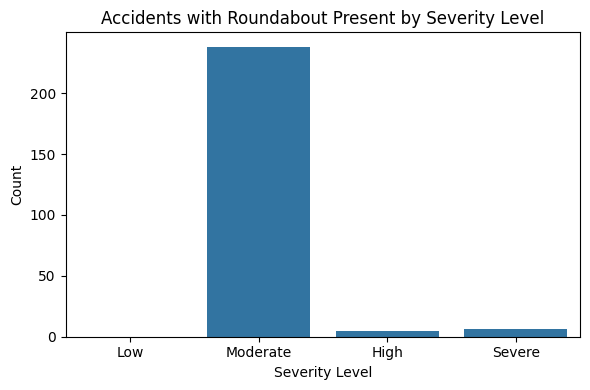

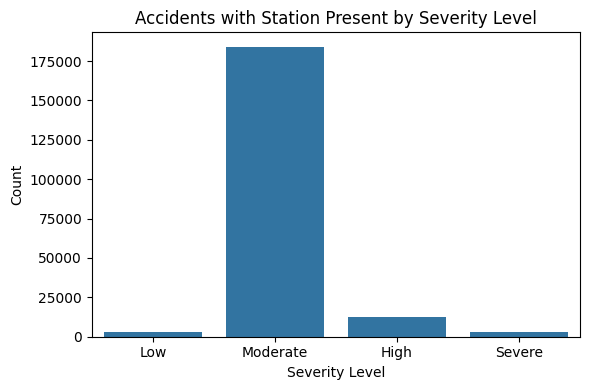

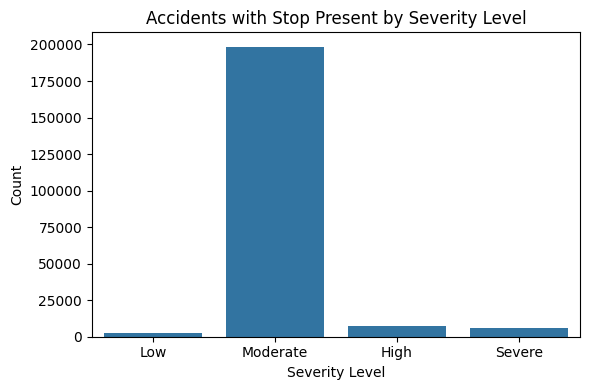

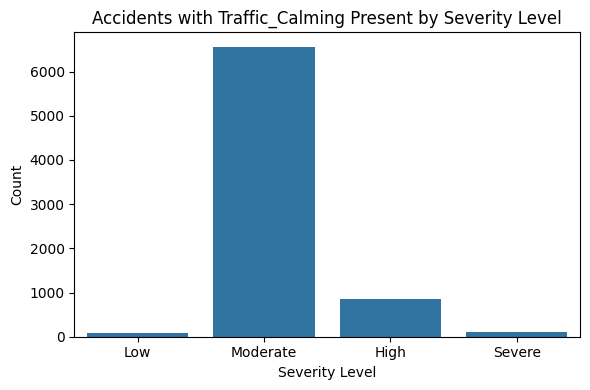

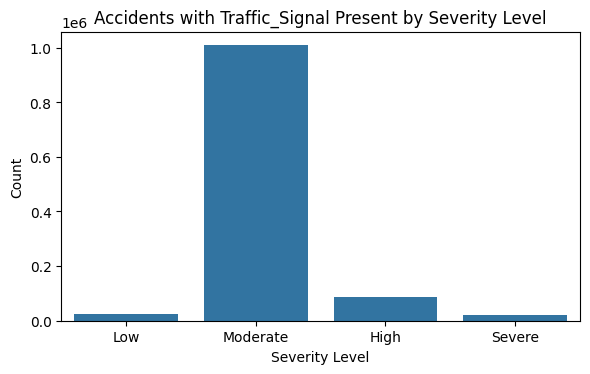

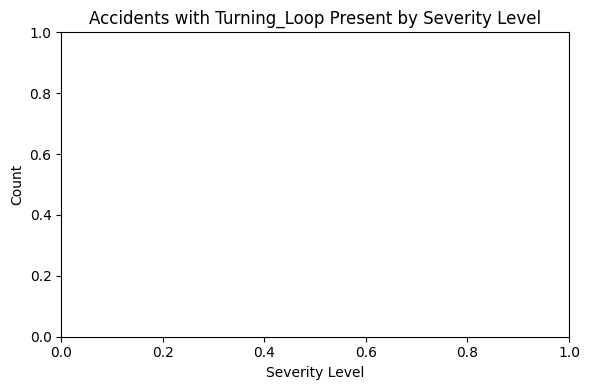

In [50]:
for col in infra_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_infra[df_infra[col] == 1], x='Severity_Level', order=['Low', 'Moderate', 'High', 'Severe'])
    plt.title(f'Accidents with {col} Present by Severity Level')
    plt.ylabel('Count')
    plt.xlabel('Severity Level')
    plt.tight_layout()
    plt.show()



# Statistical Data Analysis
Perform statistical tests to validate patterns identified:
Chi-square tests for categorical variable relationships.
T-tests or ANOVA for comparing group means.
Check assumptions and use non-parametric when appropriate.
Analyze correlations between variables.
Identify significant factors that contribute to accident severity or frequency.
Use statistical measures to support your conclusions.
Document the methodology, assumptions, and limitations of statistical analysis.

## Statistical Data Analysis - Objective 1 Accident hotspots

In [51]:
df_hotspots.head()

,ID,Severity_Level,Start_Time,City,County,State,Zipcode,Time_of_day,Day_of_week,Is_Holiday,Season,Time_period,County_State
0,A-1,High,2016-02-08 05:46:00,Dayton,Montgomery,OH,45424,5,Monday,False,Winter,Late Night,"Montgomery, OH"
1,A-2,Moderate,2016-02-08 06:07:59,Reynoldsburg,Franklin,OH,43068,6,Monday,False,Winter,Morning,"Franklin, OH"
2,A-3,Moderate,2016-02-08 06:49:27,Williamsburg,Clermont,OH,45176,6,Monday,False,Winter,Morning,"Clermont, OH"
3,A-4,High,2016-02-08 07:23:34,Dayton,Montgomery,OH,45417,7,Monday,False,Winter,Morning,"Montgomery, OH"
4,A-5,Moderate,2016-02-08 07:39:07,Dayton,Montgomery,OH,45459,7,Monday,False,Winter,Morning,"Montgomery, OH"


Chi squared test for categorical variable relationships requires 4 assumptions to be met:
1. Categorical variables only. Severity level, City, County_state, State, Zip Code, Day of week, Is holiday, season, and time period are all categorical variables
2. Independence of observations. All rows of the US accidents dataset are independent. No accident is related to another (assumed).
3. Sufficient Expected Frequency. Expected count in each cell of the contingency table will be >= 5
4. large sample size. This is a very large dataset with 7million+ observations

In [52]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(df_hotspots['Severity_Level'], df_hotspots['Time_period'])
chi2, p, dof, expected = chi2_contingency(ct)
print(pd.DataFrame(expected, index=ct.index, columns=ct.columns))

Time_period        Afternoon       Evening     Late Night       Morning  \
Severity_Level                                                            
Low             2.011522e+04  1.331938e+04    6748.317101  2.293539e+04   
Moderate        1.838417e+06  1.217315e+06  616757.846803  2.096164e+06   
High            3.879687e+05  2.568951e+05  130156.979976  4.423623e+05   
Severe          6.110248e+04  4.045927e+04   20498.856120  6.966911e+04   

Time_period             Night  
Severity_Level                 
Low               4230.701671  
Moderate        386662.098684  
High             81598.914868  
Severe           12851.284777  


       Variable       Chi2  p-value  DOF  Significant (p < 0.05)
0          City  190816.44      0.0   57                    True
1  County_State  190505.61      0.0   57                    True
2   Day_of_week   12394.78      0.0   18                    True
3    Is_Holiday    1279.22      0.0    3                    True
4        Season  109010.53      0.0    9                    True
5   Time_period   35650.39      0.0   12                    True


C:\Users\jtlee\AppData\Local\Temp\ipykernel_31792\654202282.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi_df_sorted, x='Chi2', y='Variable', palette='coolwarm')


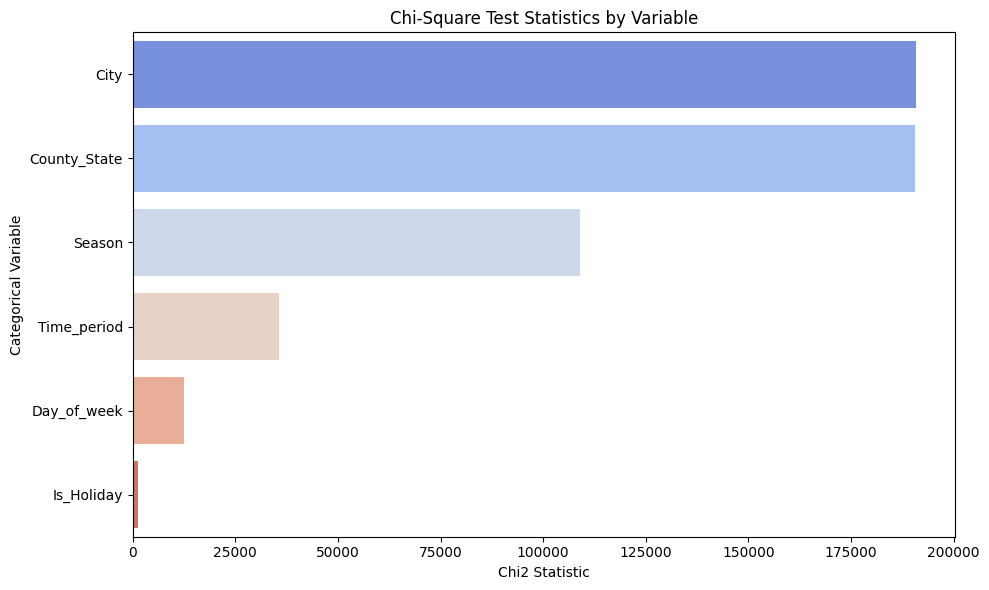

In [74]:
# Run chi squared tests for categorical variables to determine if accident severity level is dependent on other categorical features

# List of categorical variables to test against Severity_Level
cat_vars = ['City', 'County_State', 'State', 'Zipcode', 'Day_of_week', 'Is_Holiday', 'Season', 'Time_period']

# Function to reduce categorical variable to top N and group rest as 'Other'
def reduce_to_top_n(df, col, n=20):
    top_n = df[col].value_counts().nlargest(n).index
    return df[col].apply(lambda x: x if x in top_n else 'Other')

# Apply to categorical variables
df_hotspots['City'] = reduce_to_top_n(df_hotspots, 'City', 20)
df_hotspots['County_State'] = reduce_to_top_n(df_hotspots, 'County_State', 20)
df_hotspots['Zipcode'] = reduce_to_top_n(df_hotspots, 'Zipcode', 20)

# Loop through each variable and perform chi-square test
chi_results = []

for var in cat_vars:
    contingency = pd.crosstab(df_hotspots['Severity_Level'], df_hotspots[var])
    if (contingency.values < 5).sum() > 0:
        continue
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results.append({
        'Variable': var,
        'Chi2': round(chi2, 2),
        'p-value': round(p, 6),
        'DOF': dof,
        'Significant (p < 0.05)': p < 0.05
    })

chi_df = pd.DataFrame(chi_results)
print(chi_df)

# Sort by Chi2 value
chi_df_sorted = chi_df.sort_values("Chi2", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=chi_df_sorted, x='Chi2', y='Variable', palette='coolwarm')
plt.title('Chi-Square Test Statistics by Variable')
plt.xlabel('Chi2 Statistic')
plt.ylabel('Categorical Variable')
plt.tight_layout()
plt.show()
chi_df.to_csv("chi_squared_results.csv", index=False)

H0 is that there is no association between accident severity and the feature. They are independent of each other
H1 is that there is an association between accident severity and the feature

City, County, day of week, is holiday, season, and time period features showed statistically significant associations (p < 0.05). We can reject the null hypothesis and conclude that there is an association and the association is unlikely due to chance.

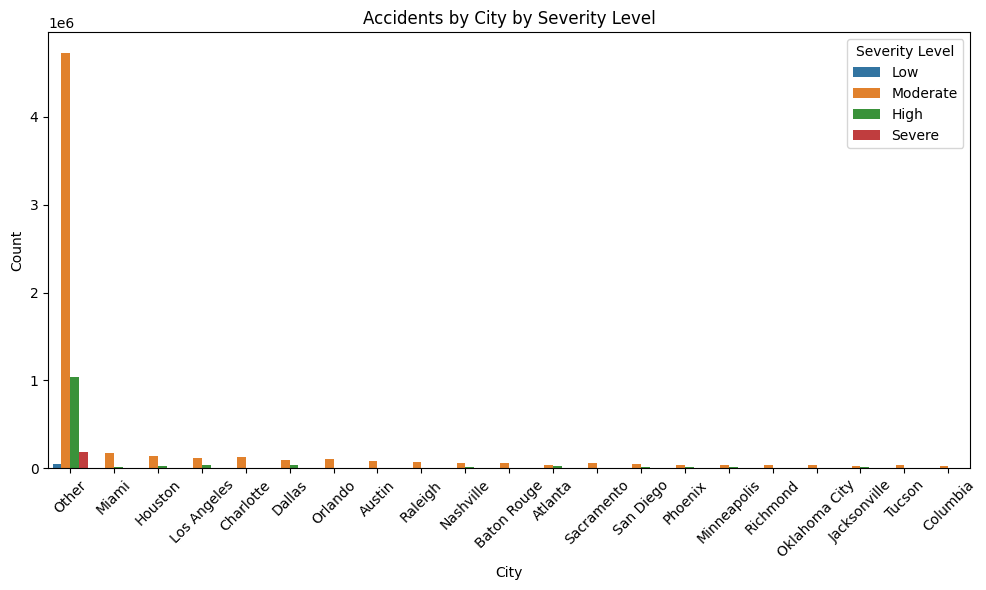

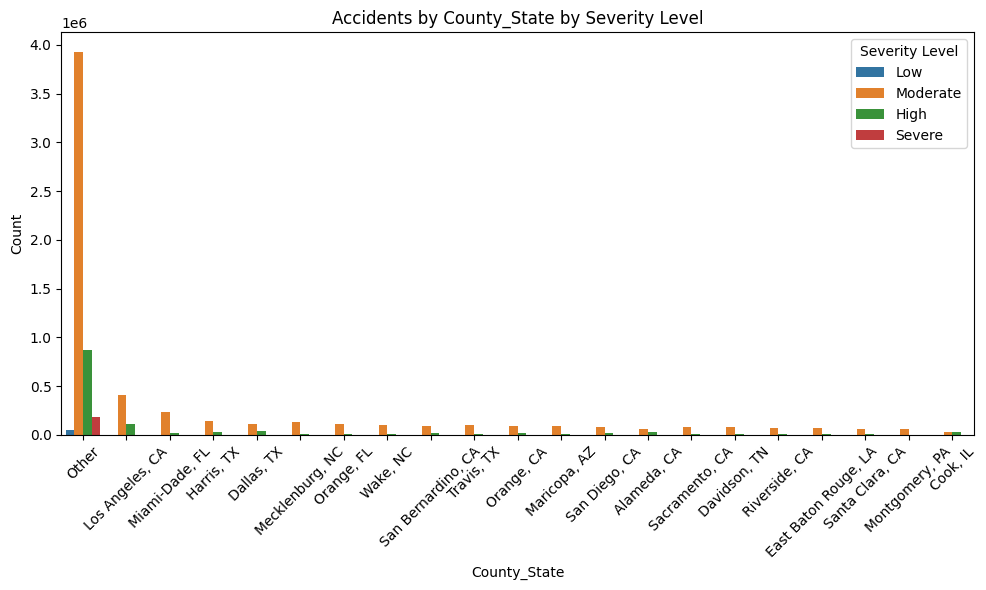

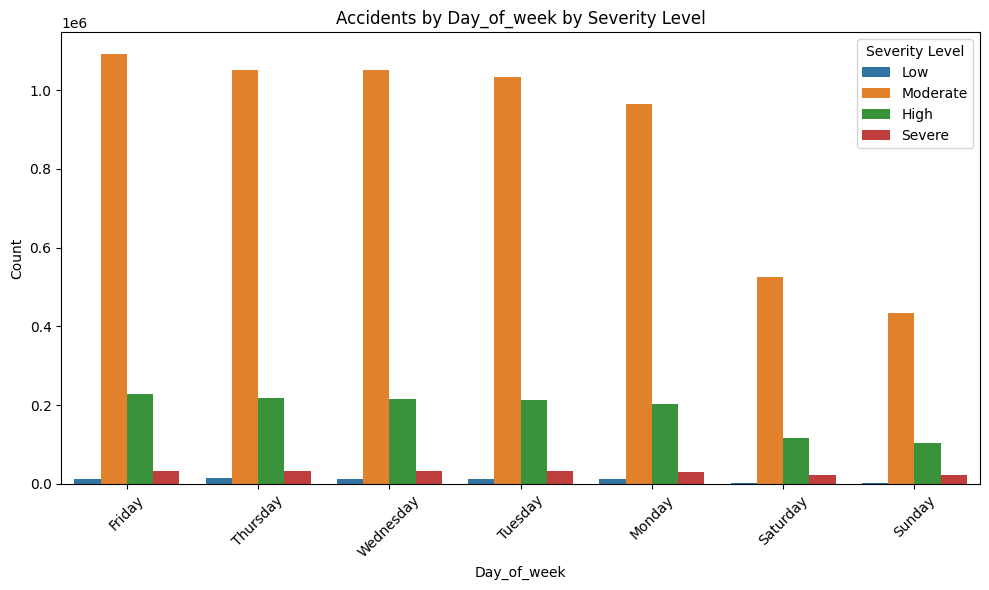

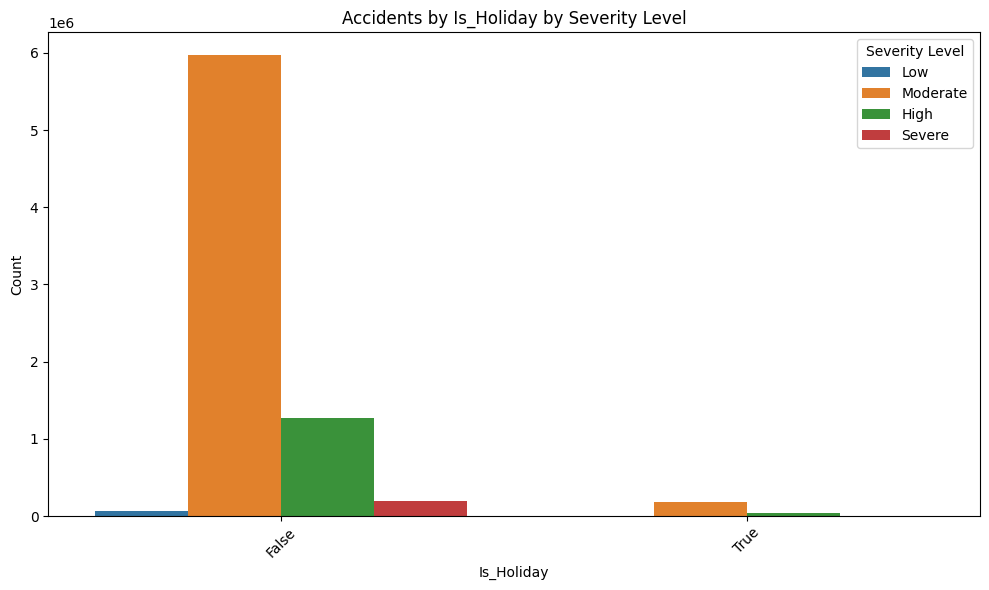

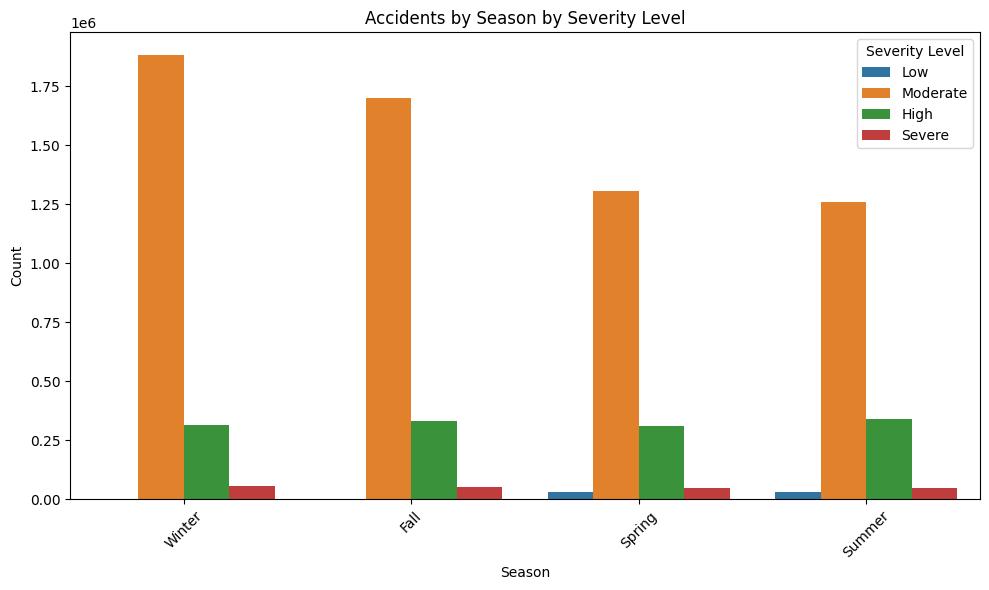

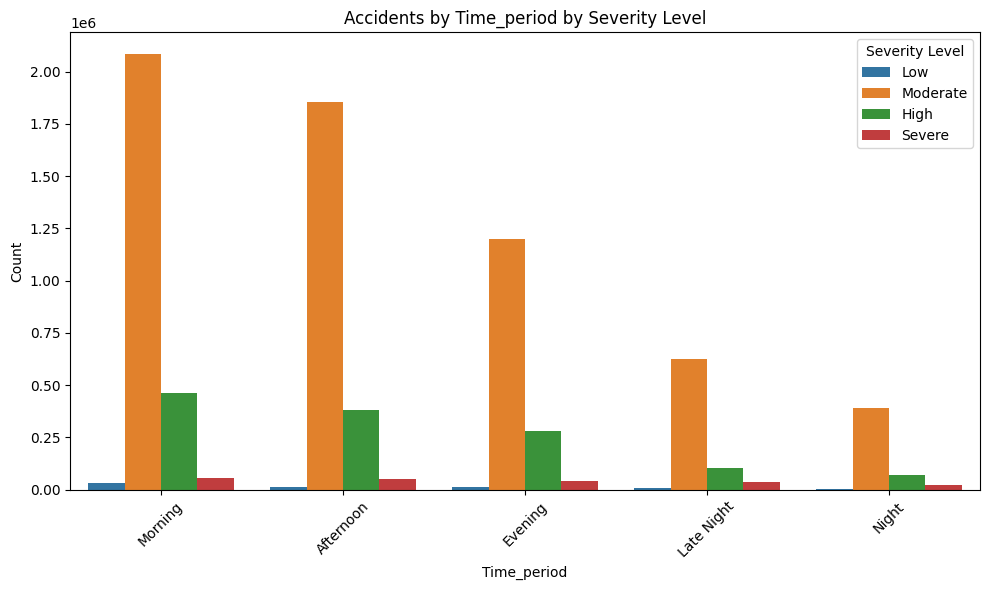

In [54]:
# visualize the patterns

cat_vars = ['City', 'County_State', 'Day_of_week', 'Is_Holiday', 'Season', 'Time_period']

for var in cat_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_hotspots, x=var, hue='Severity_Level', order=df_hotspots[var].value_counts().index)
    plt.title(f'Accidents by {var} by Severity Level')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Severity Level')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [55]:
# chi square tells us that there is a significant association between the categorical variables and the severity level of accidents.

# Cramer's V is a measure of association between two categorical variables, providing a value between 0 and 1, where 0 indicates no association and 1 indicates perfect association.

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

for var in cat_vars:
    print(f"\nCramer's V for Severity Level vs {var}")
    print(cramers_v(pd.crosstab(df_hotspots['Severity_Level'], df_hotspots[var])))




Cramer's V for Severity Level vs City
0.09082098655020052

Cramer's V for Severity Level vs County_State
0.10130010561558554

Cramer's V for Severity Level vs Day_of_week
0.023124637662790208

Cramer's V for Severity Level vs Is_Holiday
0.012867324654635194

Cramer's V for Severity Level vs Season
0.06857879462577932

Cramer's V for Severity Level vs Time_period
0.03921820910020054


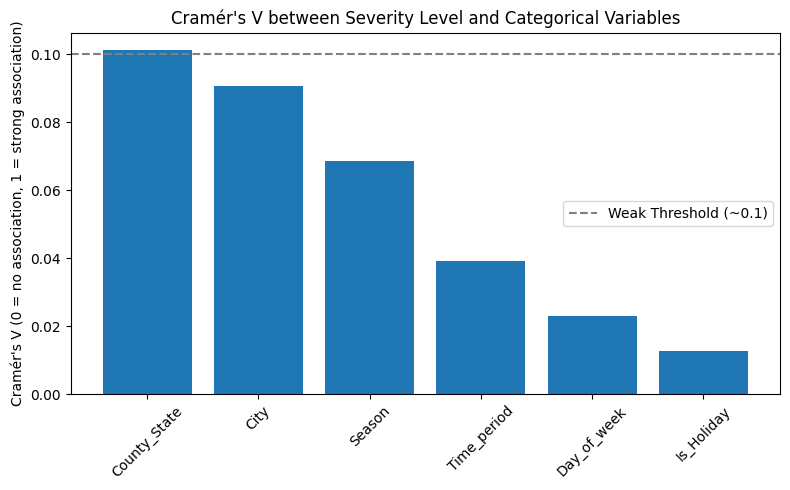

In [56]:
# Dictionary of Cramer's V values
cramers_v_scores = {
    'City': 0.0908,
    'County_State': 0.1013,
    'Day_of_week': 0.0231,
    'Is_Holiday': 0.0129,
    'Season': 0.0686,
    'Time_period': 0.0392
}

# Sort score
cramers_v_scores = dict(sorted(cramers_v_scores.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(8, 5))
plt.bar(cramers_v_scores.keys(), cramers_v_scores.values())
plt.axhline(0.1, color='gray', linestyle='--', label='Weak Threshold (~0.1)')
plt.title("Cramér's V between Severity Level and Categorical Variables")
plt.ylabel("Cramér's V (0 = no association, 1 = strong association)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# For hotspot features
pd.Series(cramers_v_scores).reset_index().rename(
    columns={'index': 'Variable', 0: "Cramer's V"}
).to_csv("cramers_v_hotspot.csv", index=False)

### Chi square test summary
Chi square tests were performed to determine whether accident severity level is significantly associated with various temporal and geographic categorical variables:
-city
-county
-state
-zipcode
-day of week
-is holiday
-season
-time of day

These results suggest that accident severity is not randomly distributed, but instead associated with time and location factors.

### Cramer's V Summary
To assess the strength of these associations, Cramer's V was calculated  for city, county, day of week, is holiday, season and time of day.

Although associations were statistically significant, the effect sizes are weak, as indicates by the Cramer's V scores above. While time and location do matter, they do not strongly predict accident severity on their own. This suggests other variablesmay play larger roles.

We can only conclude that county and city have a weak effect on accident severity level based on Cramer's V scores. However, given the scale of the dataset with over 7 million accidents, even weak associations can represent meaningful real world impact. It should be recommended that DOT consider time and location based interventions as part of a broader stratgy to reduce traffic-related accidents and associated harm and fatalities.

## Statistical Data Analysis - Objective 2 Environmental risk

Perform ANOVA to compare the numerical environmental variables across the 4 categories of severity levels. 

For one way ANOVA, assumptions have to be met:
Independence of observations - each accident should be independent of others. This should be the case for all observations in the dataset
Normality - each weather feature should be normal. However, according to the plots above in EDA, only temperature is normally distributed based on visual plot
homogeneity - Variance of the weather variables should be similar across all severity levels
scale of measurement - weather variables should be continuous, which they are

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on weather features by severity level
weather_cols = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

for var in weather_cols:
    print(f"\n--- Shapiro-Wilk Test for {var} ---")
    for level in df_weather['Severity_Level'].unique():
        group_data = df_weather[df_weather['Severity_Level'] == level][var]
        
        # Shapiro only allows up to 5000 samples
        if len(group_data) > 5000:
            group_data = group_data.sample(5000, random_state=42)

        stat, p = shapiro(group_data)
        print(f"Severity: {level} | W = {stat:.4f}, p = {p:.4f} | {'Not normal' if p < 0.05 else 'Normal'}")




--- Shapiro-Wilk Test for Temperature(F) ---
Severity: Moderate | W = 0.9807, p = 0.0000 | Not normal
Severity: High | W = 0.9714, p = 0.0000 | Not normal
Severity: Low | W = 0.9924, p = 0.0000 | Not normal
Severity: Severe | W = 0.9827, p = 0.0000 | Not normal

--- Shapiro-Wilk Test for Wind_Chill(F) ---
Severity: Moderate | W = 0.9556, p = 0.0000 | Not normal
Severity: High | W = 0.8827, p = 0.0000 | Not normal
Severity: Low | W = 0.9836, p = 0.0000 | Not normal
Severity: Severe | W = 0.9562, p = 0.0000 | Not normal

--- Shapiro-Wilk Test for Humidity(%) ---
Severity: Moderate | W = 0.9666, p = 0.0000 | Not normal
Severity: High | W = 0.9691, p = 0.0000 | Not normal
Severity: Low | W = 0.9385, p = 0.0000 | Not normal
Severity: Severe | W = 0.9602, p = 0.0000 | Not normal

--- Shapiro-Wilk Test for Pressure(in) ---
Severity: Moderate | W = 0.6450, p = 0.0000 | Not normal
Severity: High | W = 0.5553, p = 0.0000 | Not normal
Severity: Low | W = 0.7149, p = 0.0000 | Not normal
Severity:

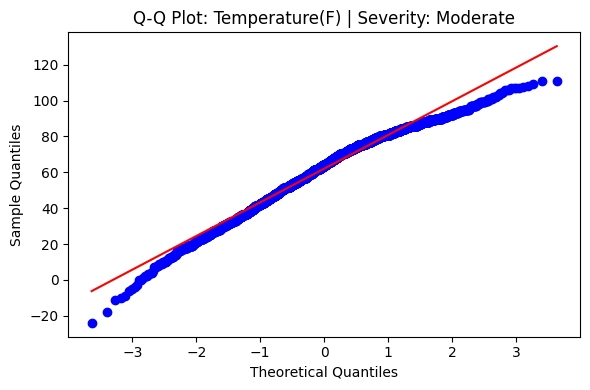

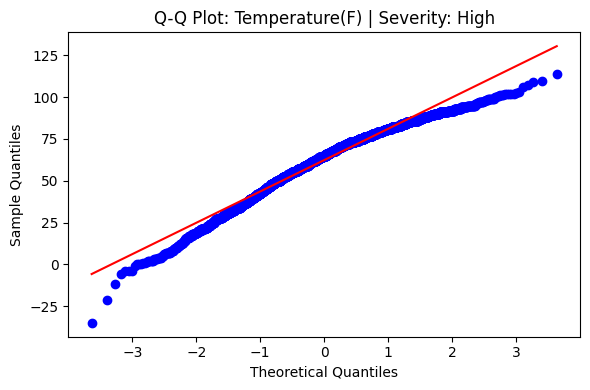

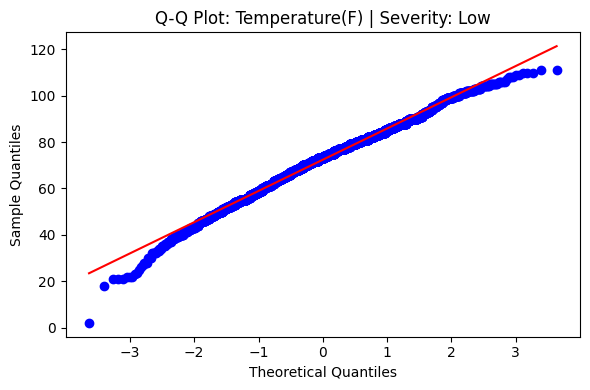

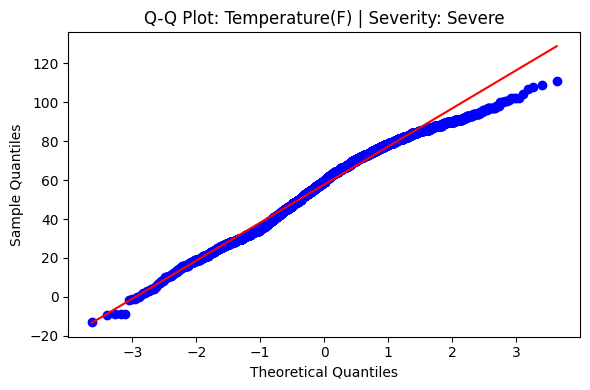

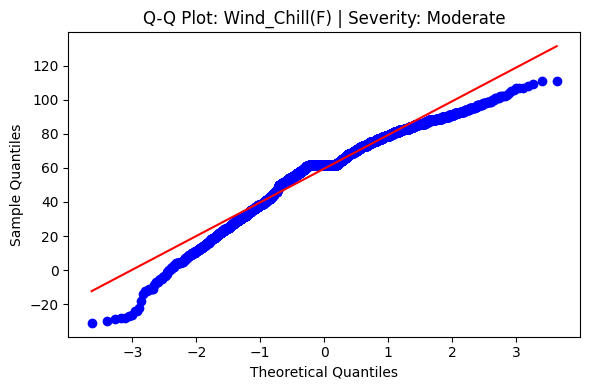

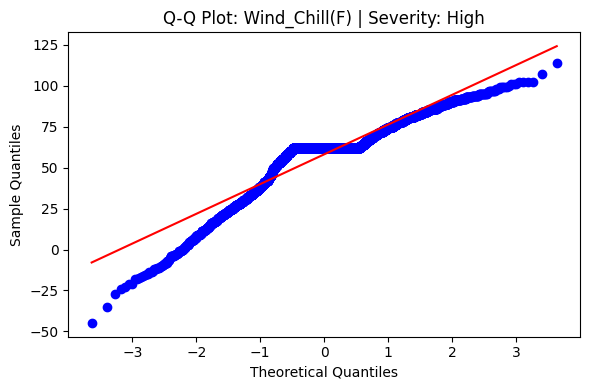

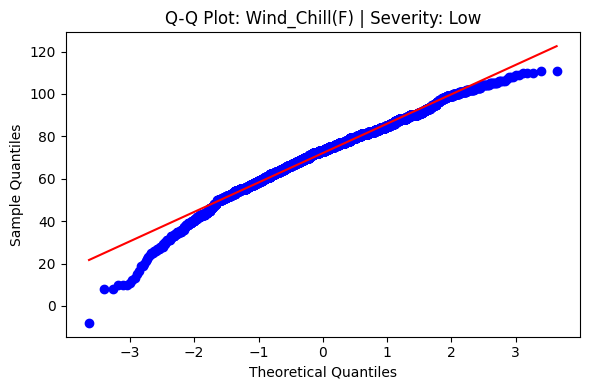

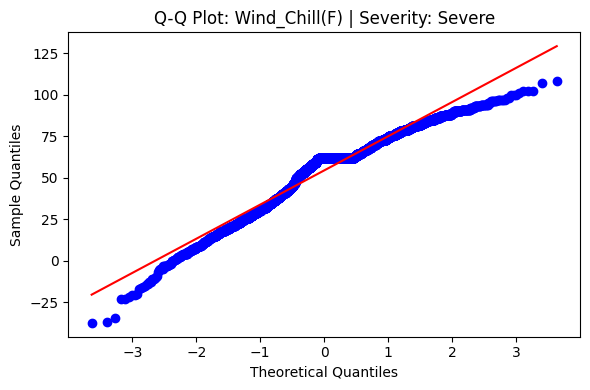

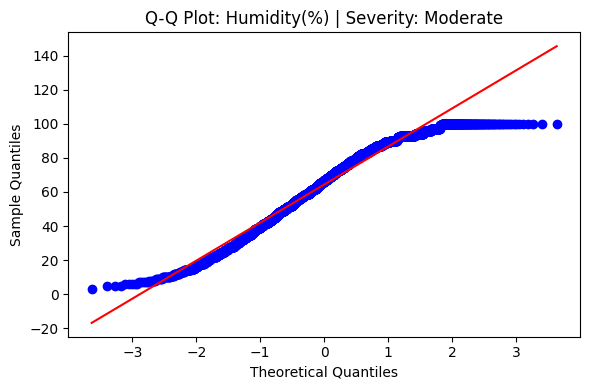

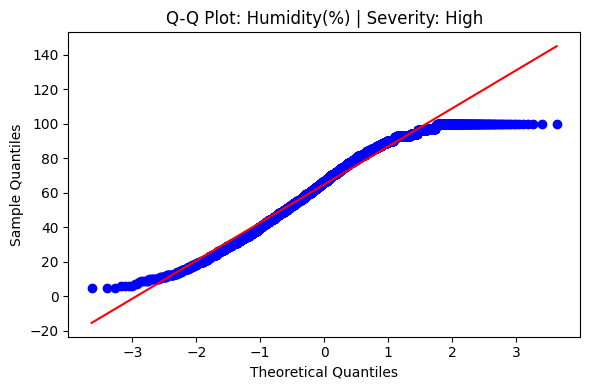

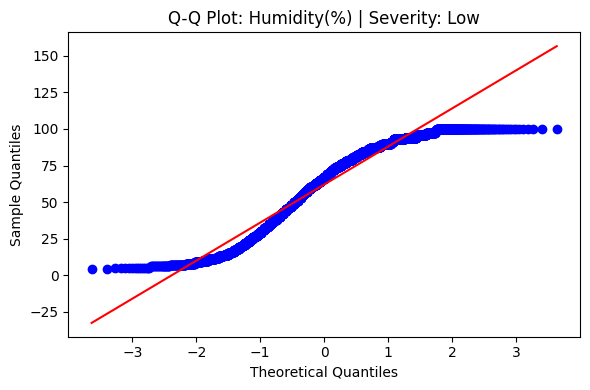

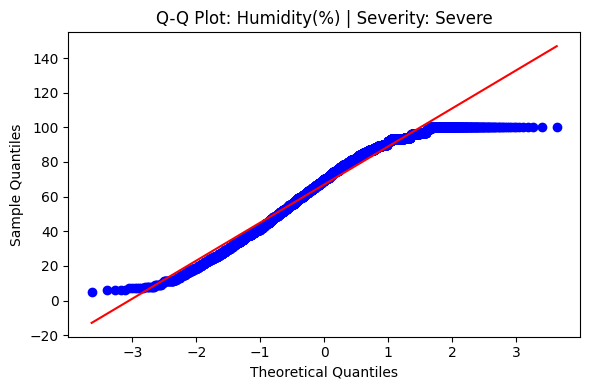

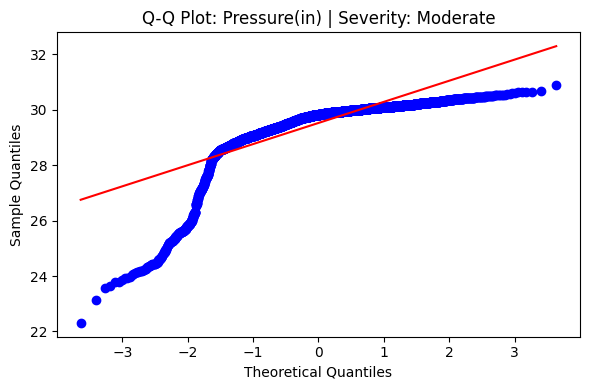

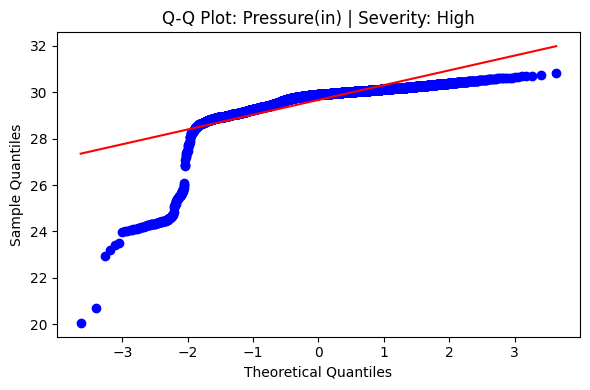

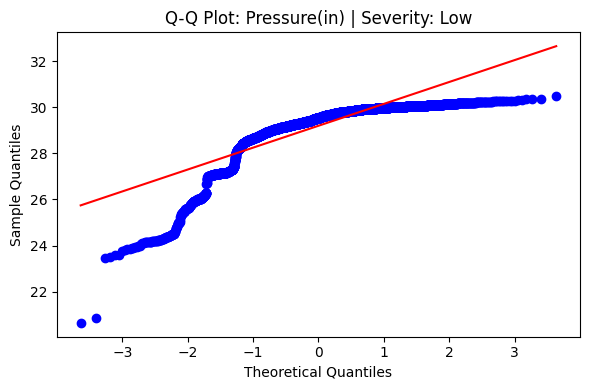

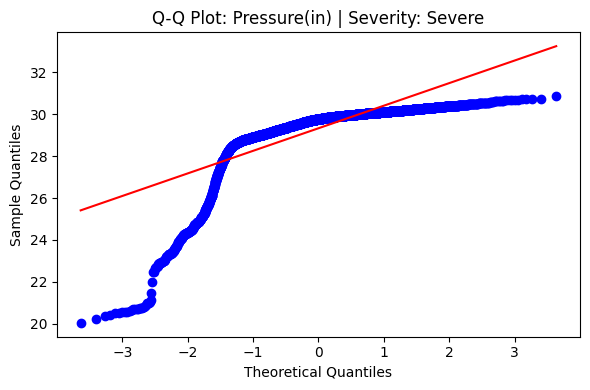

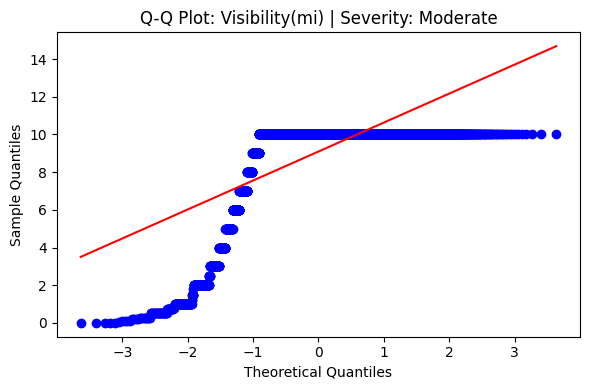

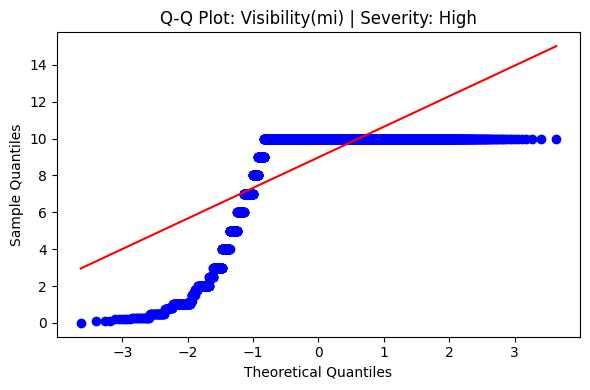

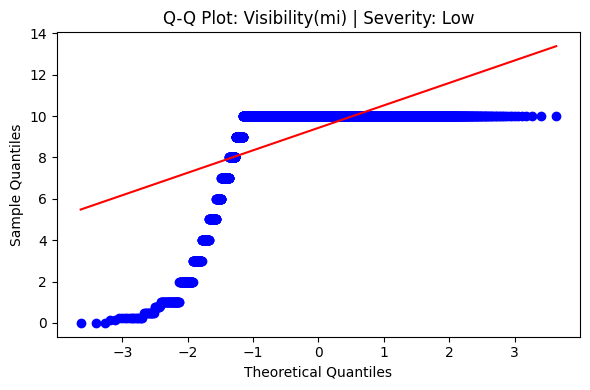

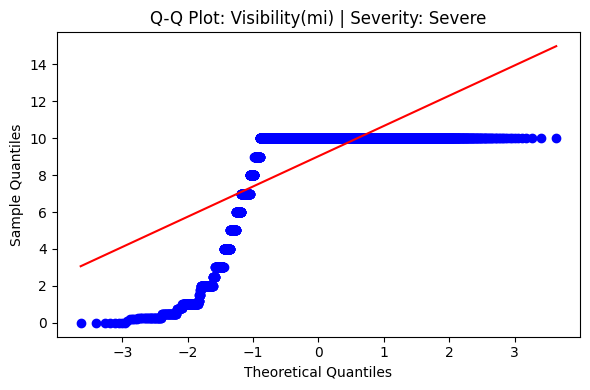

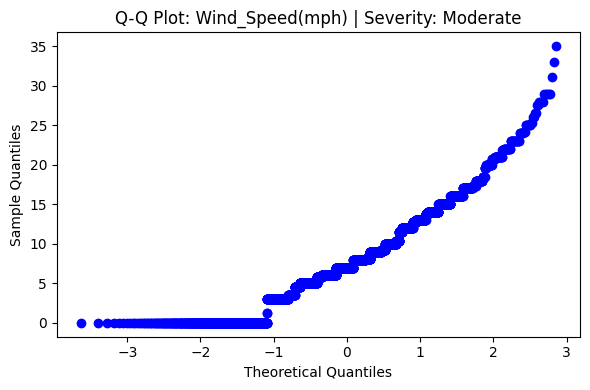

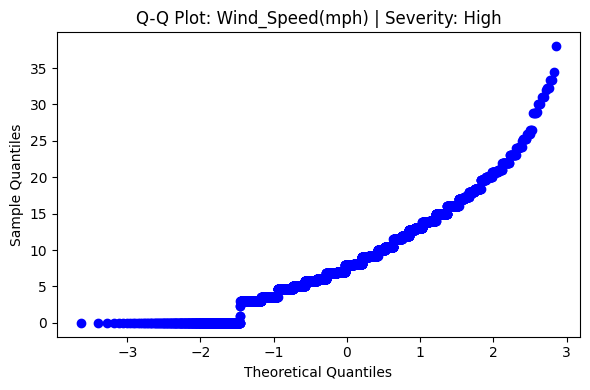

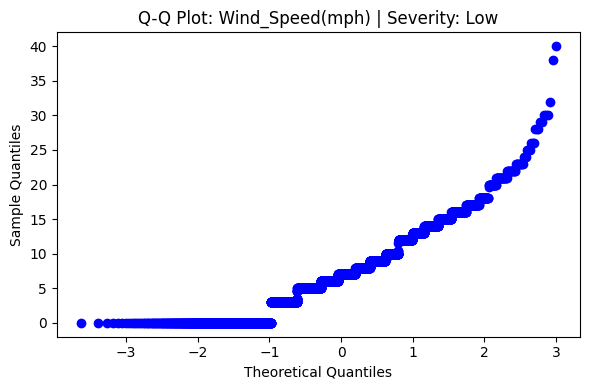

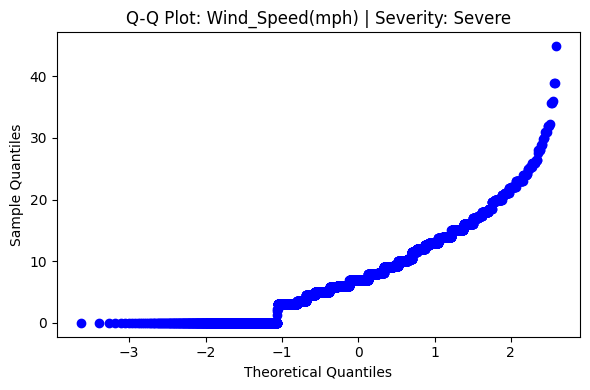

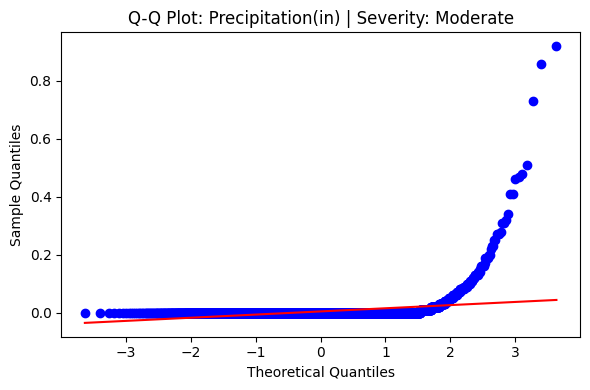

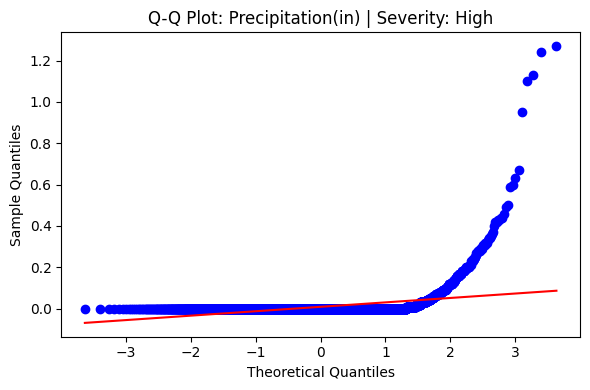

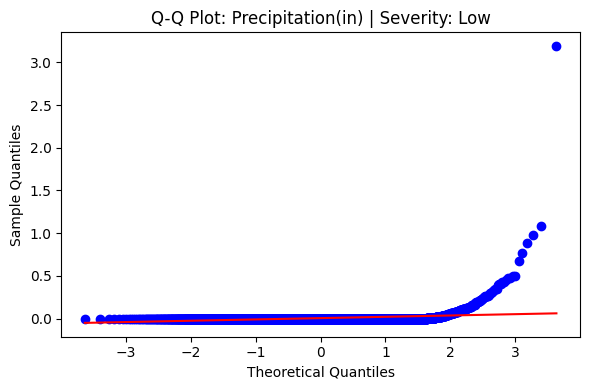

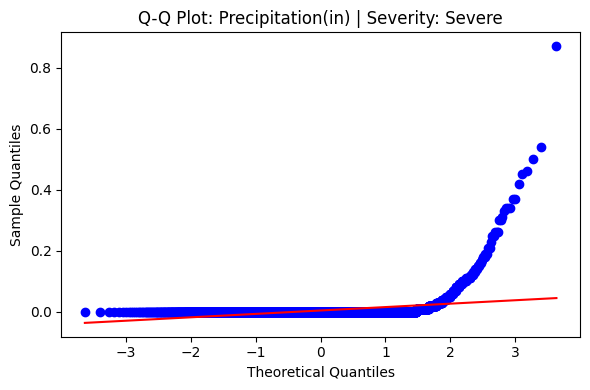

In [75]:
import scipy.stats as stats

severity_levels = df_weather['Severity_Level'].unique()

# Q-Q Plots for weather features by severity level

for var in weather_cols:
    for level in severity_levels:
        group_data = df_weather[df_weather['Severity_Level'] == level][var]

        # Limit to 5000 points for clarity
        if len(group_data) > 5000:
            group_data = group_data.sample(5000, random_state=42)

        # Q-Q Plot
        plt.figure(figsize=(6, 4))
        stats.probplot(group_data, dist="norm", plot=plt)
        plt.title(f"Q-Q Plot: {var} | Severity: {level}")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Quantiles")
        plt.tight_layout()
        plt.show()


According to Shapiro-Wilk's, the assumption of normality is not met for any of the weather variables, even temperature which looked normal visually via histplot
When looking at the Q-Q plots, only temperature looks normally distributed, while the other variables do not fall along the diagnoal line and show skew and deviation from normality.


In [59]:
# check for homogeneity of variance using Levene's test
from scipy.stats import levene

weather_cols = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

for var in weather_cols:
    groups = [
        df_weather[df_weather['Severity_Level'] == level][var]
        for level in ['Low', 'Moderate', 'High', 'Severe']
    ]
    stat, p = levene(*groups)
    print(f"{var:<20} | Levene’s stat: {stat:8.2f} | p-value: {p:.6f} | {'Unequal variances' if p < 0.05 else 'Equal variances'}")


Temperature(F)       | Levene’s stat:  4516.48 | p-value: 0.000000 | Unequal variances
Wind_Chill(F)        | Levene’s stat: 12764.00 | p-value: 0.000000 | Unequal variances
Humidity(%)          | Levene’s stat:  2125.30 | p-value: 0.000000 | Unequal variances
Pressure(in)         | Levene’s stat:  6273.07 | p-value: 0.000000 | Unequal variances
Visibility(mi)       | Levene’s stat:   784.28 | p-value: 0.000000 | Unequal variances
Wind_Speed(mph)      | Levene’s stat:      nan | p-value: nan | Equal variances
Precipitation(in)    | Levene’s stat:   591.22 | p-value: 0.000000 | Unequal variances


All of the weather variables have unequal variances and do not meet the assumption of homogeneity.
Since homogeneity and normality are not met, we will have to use Welch's ANOVA which is more robust to unequal variance and non-normality.

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

weather_cols = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

# Store results
welch_results = []

# Run Welch's ANOVA for each variable
for var in weather_cols:
    formula = f'Q("{var}") ~ C(Severity_Level)'
    model = ols(formula, data=df_weather).fit()
    welch_anova = sm.stats.anova_lm(model, typ=2, robust='hc3')  # HC3 = heteroscedasticity-consistent
    
    f_stat = welch_anova['F'].values[0]
    p_val = welch_anova['PR(>F)'].values[0]
    
    welch_results.append({
        'Variable': var,
        'Welch F-statistic': round(f_stat, 2),
        'p-value': round(p_val, 6),
        'Significant (p < 0.05)': p_val < 0.05
    })

# Convert to DataFrame
welch_df = pd.DataFrame(welch_results)

# Show results
print(welch_df)

welch_df.to_csv("welch_anova_results.csv", index=False)


            Variable  Welch F-statistic  p-value  Significant (p < 0.05)
0     Temperature(F)           15570.35      0.0                    True
1      Wind_Chill(F)           21678.92      0.0                    True
2        Humidity(%)             914.70      0.0                    True
3       Pressure(in)           11703.28      0.0                    True
4     Visibility(mi)            1280.38      0.0                    True
5    Wind_Speed(mph)            7057.80      0.0                    True
6  Precipitation(in)             326.38      0.0                    True


Using Welch's ANOVA we see p-values < 0.05 which tells us that all weather variables have significant differences.

In [61]:
# use Dunn's test for post-hoc analysis to see which groups are different
import scikit_posthocs as sp

for var in weather_cols:
    print(f"\n--- Dunn’s Post-Hoc Test for {var} ---")
    dunn = sp.posthoc_dunn(
        df_weather, 
        val_col=var, 
        group_col='Severity_Level', 
        p_adjust='bonferroni'
    )
    print(dunn.round(4))
dunn.to_csv(f"dunns_test_{var.replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'pct').replace('/', '_')}.csv")


--- Dunn’s Post-Hoc Test for Temperature(F) ---
          High  Low  Moderate  Severe
High       1.0  0.0       0.0     0.0
Low        0.0  1.0       0.0     0.0
Moderate   0.0  0.0       1.0     0.0
Severe     0.0  0.0       0.0     1.0

--- Dunn’s Post-Hoc Test for Wind_Chill(F) ---
          High  Low  Moderate  Severe
High       1.0  0.0       0.0     0.0
Low        0.0  1.0       0.0     0.0
Moderate   0.0  0.0       1.0     0.0
Severe     0.0  0.0       0.0     1.0

--- Dunn’s Post-Hoc Test for Humidity(%) ---
          High  Low  Moderate  Severe
High       1.0  0.0       0.0     0.0
Low        0.0  1.0       0.0     0.0
Moderate   0.0  0.0       1.0     0.0
Severe     0.0  0.0       0.0     1.0

--- Dunn’s Post-Hoc Test for Pressure(in) ---
          High  Low  Moderate  Severe
High       1.0  0.0       0.0     0.0
Low        0.0  1.0       0.0     0.0
Moderate   0.0  0.0       1.0     0.0
Severe     0.0  0.0       0.0     1.0

--- Dunn’s Post-Hoc Test for Visibility(mi) ---
 

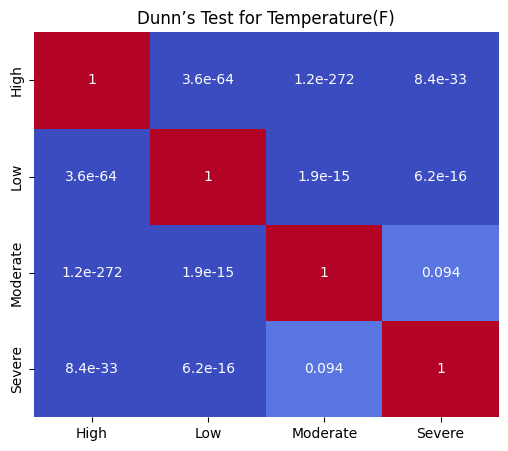

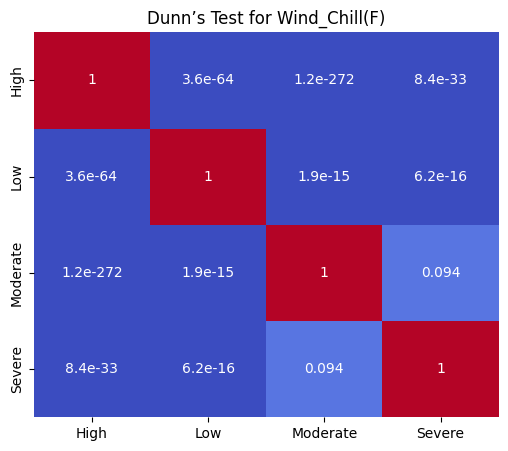

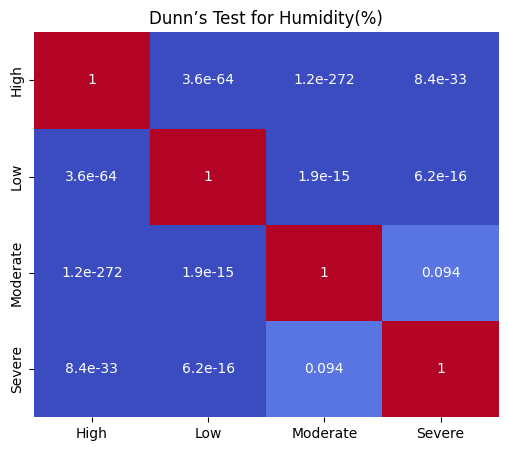

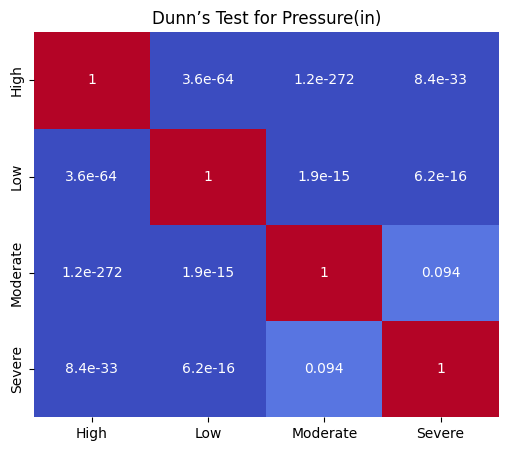

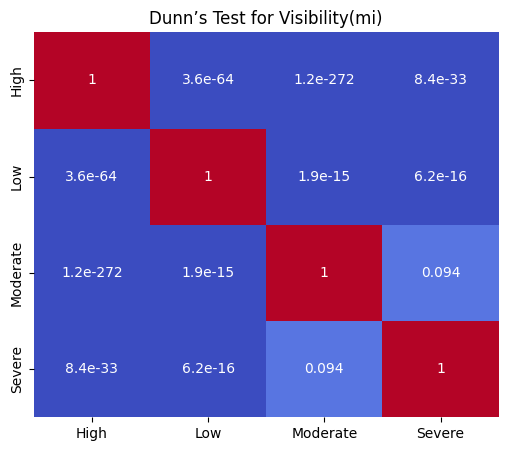

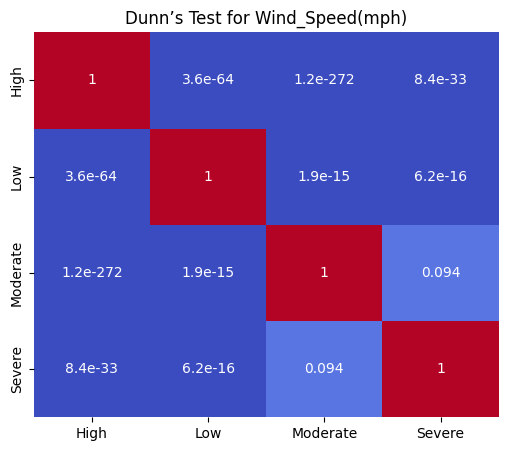

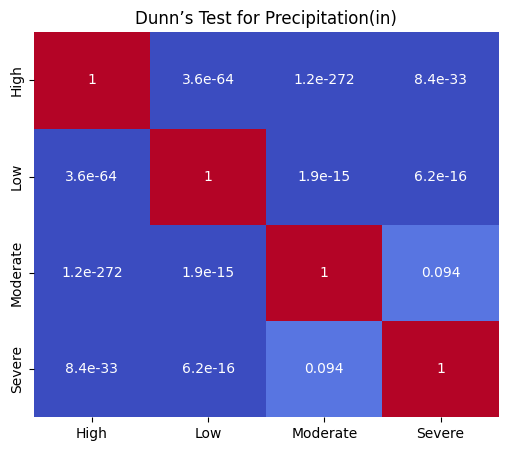

In [62]:
# visualize dunn's test results

for var in weather_cols:
    plt.figure(figsize=(6, 5))
    sns.heatmap(dunn, annot=True, cmap='coolwarm', cbar=False)
    plt.title(f"Dunn’s Test for {var}")
    plt.show()


In [63]:
weather_cols = [
    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

for col in weather_cols:
    print(df_weather.groupby("Severity_Level")[col].mean())


Severity_Level
High        62.552442
Low         72.422765
Moderate    61.702608
Severe      58.366210
Name: Temperature(F), dtype: float64
Severity_Level
High        58.198140
Low         72.153413
Moderate    59.152136
Severe      55.145015
Name: Wind_Chill(F), dtype: float64
Severity_Level
High        64.802637
Low         61.958591
Moderate    64.376663
Severe      66.712954
Name: Humidity(%), dtype: float64
Severity_Level
High        29.652702
Low         29.202729
Moderate    29.494407
Severe      29.359539
Name: Pressure(in), dtype: float64
Severity_Level
High        9.012538
Low         9.451619
Moderate    9.054801
Severe      9.002323
Name: Visibility(mi), dtype: float64
Severity_Level
High        8.308021
Low         7.161472
Moderate    7.565188
Severe      7.646876
Name: Wind_Speed(mph), dtype: float64
Severity_Level
High        0.008654
Low         0.004905
Moderate    0.005442
Severe      0.005103
Name: Precipitation(in), dtype: float64


Dunn's test shows that:
For temperature, all severity pairs differ significantly. Temperature varies meaningfully with accident severity. From the mean temperatures for each severity, we can see that Severe accidents occurred on average at lower temperatures. So lower temperatures are associated with more SEvere accidents
For windchill, all pairs differ significantly. Like temperature, colder wind chill is associated with more severe accidents
For humidity, all pair differ significantly. Per the means above, higher humidity is associated with more severe accidents.
They may reflect hazardous weather conditions such as icy roads, fog, rain, etc. that may increase risk of accidents.

For all other weather features, they show statistical significance but their actual mean differences show minimal/negligible association with severity of accidents and are unlikely to be useful predictors of accident severity on their own.

## Statistical Data Analysis - Objective 3 Infrastructure considerations

Chi square test of independence to test whether severity level is independent of the presence of infrastructure features

Assumptions to be met:
Categorical variables - severity level and Bump, Crossing, Give_way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, and Turning_Loop are all categorical
independent observations - all accidents should be independent of each other
expected frequency - only roundabout has expected frequency <=5

In [64]:
from scipy.stats import chi2_contingency
import pandas as pd

infra_features = [
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 
    'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

for feature in infra_features:
    contingency = pd.crosstab(df_infra['Severity_Level'], df_infra[feature])
    
    # Run chi-square to get expected frequencies
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    # Count how many expected cells are below 5
    low_expected = (expected < 5).sum()
    
    print(f"{feature}:")
    print(f"  Expected cells < 5: {low_expected}")
    if low_expected > 0:
        print("Low expected frequency detected — consider skipping or combining categories.\n")
    else:
        print("Expected frequencies OK.\n")


Bump:
  Expected cells < 5: 0
Expected frequencies OK.

Crossing:
  Expected cells < 5: 0
Expected frequencies OK.

Give_Way:
  Expected cells < 5: 0
Expected frequencies OK.

Junction:
  Expected cells < 5: 0
Expected frequencies OK.

No_Exit:
  Expected cells < 5: 0
Expected frequencies OK.

Railway:
  Expected cells < 5: 0
Expected frequencies OK.

Roundabout:
  Expected cells < 5: 1
Low expected frequency detected — consider skipping or combining categories.

Station:
  Expected cells < 5: 0
Expected frequencies OK.

Stop:
  Expected cells < 5: 0
Expected frequencies OK.

Traffic_Calming:
  Expected cells < 5: 0
Expected frequencies OK.

Traffic_Signal:
  Expected cells < 5: 0
Expected frequencies OK.

Turning_Loop:
  Expected cells < 5: 0
Expected frequencies OK.



In [65]:
from scipy.stats import chi2_contingency

infra_cols = [
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'
]

for col in infra_cols:
    contingency = pd.crosstab(df_infra['Severity_Level'], df_infra[col])
    
    # Check minimum expected frequency
    chi2, p, dof, expected = chi2_contingency(contingency)
    if (expected < 5).sum() > 0:
        print(f"Skipped {col}: expected frequency < 5")
        continue

    print(f"\nChi-Square Test: Severity_Level vs {col}")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.6f}")
    if p < 0.05:
        print("Statistically significant association")
    else:
        print("No significant association")



Chi-Square Test: Severity_Level vs Bump
Chi2 = 222.90, p-value = 0.000000
Statistically significant association

Chi-Square Test: Severity_Level vs Crossing
Chi2 = 113097.25, p-value = 0.000000
Statistically significant association

Chi-Square Test: Severity_Level vs Give_Way
Chi2 = 567.65, p-value = 0.000000
Statistically significant association

Chi-Square Test: Severity_Level vs Junction
Chi2 = 21589.58, p-value = 0.000000
Statistically significant association

Chi-Square Test: Severity_Level vs No_Exit
Chi2 = 1070.48, p-value = 0.000000
Statistically significant association

Chi-Square Test: Severity_Level vs Railway
Chi2 = 1181.20, p-value = 0.000000
Statistically significant association
Skipped Roundabout: expected frequency < 5

Chi-Square Test: Severity_Level vs Station
Chi2 = 19291.90, p-value = 0.000000
Statistically significant association

Chi-Square Test: Severity_Level vs Stop
Chi2 = 27921.43, p-value = 0.000000
Statistically significant association

Chi-Square Test: Sev

Every infrastructure feature, except for roundabout, is statistically associated with accident severity level based on Chi-square test of independence.

In [68]:
# cramer's v for infrastructure features to determine strength of association

# Define dictionary to store results
cramers_v_infra = {}

# Calculate and store Cramér's V values
for col in infra_cols:
    contingency = pd.crosstab(df_infra['Severity_Level'], df_infra[col])
    if (contingency.values < 5).sum() > 0:
        continue
    v = cramers_v(contingency)
    cramers_v_infra[col] = round(v, 4)
    print(f"Cramer's V for Severity_Level vs {col}: {v:.4f}")

# Convert dictionary to DataFrame and export
pd.DataFrame.from_dict(cramers_v_infra, orient='index', columns=["Cramer's V"])\
    .reset_index().rename(columns={'index': 'Infrastructure_Feature'})\
    .to_csv("cramers_v_infra.csv", index=False)



Cramer's V for Severity_Level vs Bump: 0.0054
Cramer's V for Severity_Level vs Crossing: 0.1210
Cramer's V for Severity_Level vs Give_Way: 0.0086
Cramer's V for Severity_Level vs Junction: 0.0529
Cramer's V for Severity_Level vs No_Exit: 0.0118
Cramer's V for Severity_Level vs Railway: 0.0124
Cramer's V for Severity_Level vs Station: 0.0500
Cramer's V for Severity_Level vs Stop: 0.0601
Cramer's V for Severity_Level vs Traffic_Calming: 0.0056
Cramer's V for Severity_Level vs Traffic_Signal: 0.1211


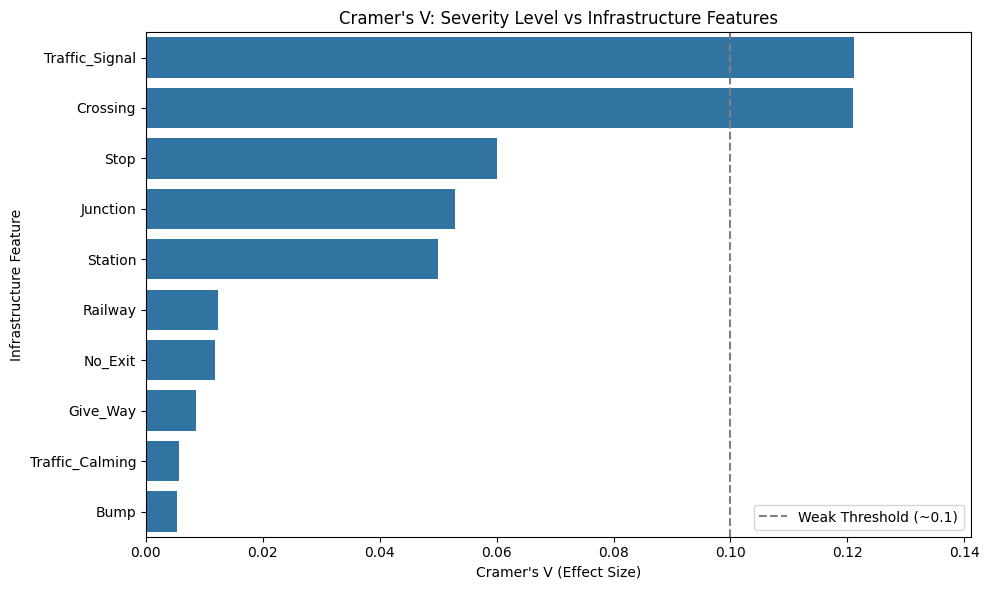

In [69]:
df_v = pd.DataFrame.from_dict(cramers_v_infra, orient='index', columns=["Cramer's V"])\
    .reset_index().rename(columns={'index': 'Infrastructure_Feature'})\
    .sort_values("Cramer's V", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Cramer's V", y="Infrastructure_Feature", data=df_v)
plt.title("Cramer's V: Severity Level vs Infrastructure Features")
plt.xlabel("Cramer's V (Effect Size)")
plt.ylabel("Infrastructure Feature")
plt.axvline(0.1, color='gray', linestyle='--', label='Weak Threshold (~0.1)')
plt.xlim(0, df_v["Cramer's V"].max() + 0.02)
plt.legend()
plt.tight_layout()
plt.show()


Cramer's V shows weak effects on severity level by the different infrastructure features. Similar to the weather analysis' conclusion, even infrastructure features that have weak effects on accident severity levels can still make have a meaningful impact when applied to the scale of the dataset. It should be recommended to DOT that they consider traffic signals, pedestrian crossings and stop signs when they consider improvements

# Evaluation
Interpret your findings in the context of the business problem. Assess whether your analysis provides actionable insights and addresses the key questions identified in the business understanding phase.

Our EDA and statistical analysis confirm similar findings. 

First, EDA shows that most accidents, regardless of severity, occur in the counties of Los Angeles, CA, Miami-Dade, FL, Harris, TX, Dallas, TX, and Mecklenburg, NC. When assessing by city, the cities with the most accidents are Miami, Houston, Los Angeles, Charlotte, then Dallas. Accidents occur in dense, high-traffic counties and cities. Additionally, statistical analysis shows that city and county have statistically significant associations between city and county, and accident severity levels. The Cramer's V test showed weak values of association for cities and counties, but when applied to the dataset's size even small improvements can have meaninful impact.

When it comes to environmental/weather features, our EDA shows that most accidents, regardless of severity, occur in the winter and fall which are seasons with more adverse weather. The associated statistical analysis shows that low temperature, low windchill, and high humidity have a statistically significant association with accident severity level. Cold weather conditions would likely have slippery roads, reduced visibility leading to more frequent and severe accidents. The Dunn's test showed weak values of association for temperature, windchill and humidity, but when applied to the dataset's size, small changes can have big impact at scale.

Lastly, EDA shows that most accidents, regardless of severity, occur near traffic signals, pedestrian crossings, and junctions. Statistical analysis shows that traffic signals, pedestrian crossings, stop signs, and junctions have a statistically significant association with accident severity level. These are all points of interaction where drivers and road users converge and must make important decisions at. Cramer's V shows weak values of association for traffic signals, crossings, stop signs and junctions, but if small changes are applied at scale, they can have significant impact.

## Business Insight/Recommendation 1

It is recommended that DOT look to high density urban counties such as Los Angeles and Miami-Dade to alleviate traffic during rush hour in the mornings and evening when commuters are trying to get to and from work. Available resources should be put into targeted infrastructure investment to ensure traffic can flow as much as possible. That could be ensuring that highways are properly maintained and widened at key corridors, ensuring lighting is sufficient for visibility in the early morning and evening, and optimizing traffic signal timing to reduce congestion at major intersections. There could be systems deployed to dynamically adjust signals based on real time traffic volumes. There improvements could help reduce accident frequency and improve safety in major cities and counties.

The potential impact could be reduction in accident rates and injuries. 

Effectiveness could be measured by 10% reduction in accident rates and severity levels which would indicate success.

There could be challenges in implementing the aforementioned improvements. High Density urban cities and counties often lack space to expand and widen highways. They could have such extreme congestion that systems for adjusting signal timing just won't help all that much. 

## Business Insight/Recommendation 2

It is recommended that DOT put special emphasis on its efforts to reducing accidents during the fall and winter when there is more inclement weather. Adverse weather during those seasons with low temperatures and windchill, and high humidity could lead to slippery roads and reduced visiblity that make it difficult for drivers to navigate to their destination. Resources should be put into early weather alert systems, proactive road and highway salting and deicing operations, real-time hazard notifications for drivers and seasonal education campaigns to remind drivers to adjust their driving behavior appropriately. These interventions could help drive down accident rates and improve public safety during the most dangerous seasons.

The potential impact could be a decrease in accident volume and improvement to public safety during the most dangerous seasons of the year. 

Effectiveness could be measured by a 10% reduction in accident rates and severity during those winter and fall months year over year.

There could be challenges in implementing these suggestions. Weather can be unpredictable, making even well designed early warning and notification systems ineffective when unexpected weather events occur. There is always population turnover which means that education campaigns must be repeated frequently to teach new drivers. 

## Business Insight/Recommendation 3

The DOT should invest in educational campaigns on TV, social media, apps, on the street to promote safety around areas of convergence such as traffic signals, pedestrian crossings, stop signs and junctions. These areas are associated with increase in accidents, many that are serious, possibly due to car and pedestrian interaction. It can also put resources into early warning signs, putting high visiblity markings on road surfaces to provide early indication to drivers that an intersection is near and coming up soon. These efforts can help improve driver awareness and reduce accident severity and occurrence at these critical decision points.

The potential impact could be a decrease in accident rates and the severity of those accidents.

Effectiveness could be measured by a 10% decrease in accidents near these junctions and the severity level of those accidents.

There could be challenges in implementing these improvements. There will always be people who don't pay 100% attention to the road, or ignore signage. Educational outreach may require repetition to reach the target audience.

In [70]:
# export cleaned dataframes to CSV files for Tableau visualization
df_hotspots.to_csv('df_hotspots.csv', index=False)
df_weather.to_csv('df_weather.csv', index=False)
df_infra.to_csv('df_infra.csv', index=False)

### Tableau Dashboard 

https://public.tableau.com/views/USTrafficAccidents_17522770286520/Thedashboard?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Conclusion and Next Steps
This analysis examined traffic accident trends across cities/counties, time of day, seasons, weather, and infrastructure to inform potential safety improvements.

Objective 1 - Morning and afternoon had the highest accident volumes. High density counties like LA and Miami-Dade had the most accidents.

Objective 2 - Winter and fall had the most accidents. Temperature and windchill were significantly different between severity levels(confirmed by Welch's ANOVA and Dunn's posthoc test)

Objective 3 - Accidents are more likely to occur at places with traffic signals and crossings. Traffic signals showed the strongest assocation with severity (cramer's V = 0.12)

The Cramer's V scores suggest that accident severity is not random across cities or infrastructure. Although Cramer's V scores are not significant, when applied to a dataset of this scale, even small improvements will have meaningful impact overall.

Next steps would be to explore real time weather feeds to build predictive risk models and incorporate driver demographics where possible.
